<a href="https://colab.research.google.com/github/soupdoumplings/5CS037-Assignment1-HDI-Analysis--UjwalShrestha-/blob/main/np03cs4a240006_UjwalShrestha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment I: Statistical Interpretation and Exploratory Data Analysis
## Analysis of the Human Development Index (HDI)

**Course:** 5CS037 – Concepts and Technologies of AI  
**Student Name:** Ujwal Shrestha  
**College:** Herald College, Kathmandu  
**StudentID:** np03cs4a240006  
**Date:** January 2026


## 1. Import Libraries

In [491]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Problem 1: Basic Data Exploration & Trend Visualization

## 3.1 Problem - 1A - Single Year HDI Exploration (Latest Year: 2022)

### Task 1: Extract Latest Year

In [492]:
# Setting display optiion to view all columns instead of ...
pd.set_option('display.max_columns', None)


In [493]:
# Loading given csv file: "Human_Development_Index_Dataset.csv"

try:
  csv_path = "/content/Human_Development_Index_Dataset.csv"
  hdi_dataset = pd.read_csv(csv_path, encoding='latin1')

except FileNotFoundError:
  print("File not found. Please check the file path.")

except Exception as e:
  print(f"An ERROR occurred during data loading: {e}")


# Loading the dataset(Top 5)
hdi_dataset.head()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,43.709,2.936460,2.117230,4.532768,0.871962,0.201659,1.493952,3115.670448,NaN,NaN,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,44.353,3.228456,2.246242,4.768261,0.915267,0.218944,1.578809,2817.304736,NaN,NaN,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,45.070,3.520452,2.383115,5.015989,0.958573,0.236229,1.663665,2474.681985,NaN,NaN,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,50.216,3.812448,2.528328,5.276587,1.001878,0.253514,1.748522,1723.019763,NaN,NaN,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,49.531,4.104445,2.682390,5.550723,1.045184,0.270800,1.833378,1202.010488,NaN,NaN,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


### Extra: Defining Functions for reusing for

* Detecting invalid values:
* Checking and cleaning country feature:
* Plotting skewness in graph:
* Imputing numeric values inplace of null values:

In [494]:
# Declaring a function for detecting invalid value
def detect_invalid_values(df):
    invalid_patterns = ["-", "NA", "null", "NaN", ""]
    invalid_counts = {}

    for col in df.columns:
        if df[col].dtype == 'object':
            # Checking for invalid values in string columns
            invalid_markings = (
                df[col].astype(str).str.strip().isin(invalid_patterns)
            )
            count = invalid_markings.sum()
            if count > 0:
                invalid_counts[col] = count
        else:
            # Checking numeric columns for zeros
            count = (df[col] == 0).sum()
            if count > 0:
                invalid_counts[col] = count

    return invalid_counts

In [495]:
# Declaring a function for cleaning invalid countries.
def clean_country_data(df):

    original_count = len(df)

    non_countries = [
        "Very high human development", "High human development",
        "Medium human development", "Low human development",
        "Arab States", "East Asia and the Pacific",
        "Europe and Central Asia", "Latin America and the Caribbean",
        "South Asia", "Sub-Saharan Africa", "World"
    ]

    df_clean = df[~df['country'].isin(non_countries)].copy()

    # Report cleaning results
    removed_count = original_count - len(df_clean)

    print(f"Rows removed: {removed_count}")
    print(f"Remaining rows: {len(df_clean)}")
    print(f"Unique countries: {df_clean['country'].nunique()}")

    # For verification, showing sample of cleaned countries from top and bottom
    country_unique = df_clean['country'].unique()
    print(f"\nVerification - Sample of cleaned country names:")
    print(f"First few countries: {country_unique[:3]}")
    print(f"\nLast few countries: {country_unique[-3:]}")
    return df_clean

In [496]:
def plot_skewness(df, columns=None):
    """
    Plots skewness values for numeric columns.
    """

    if columns is None:
        columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Calculate skewness
    skewness = df[columns].skew().sort_values()

    # Plot
    plt.figure(figsize=(12, 8))
    skewness.plot(kind='bar')

    plt.yticks(np.arange(int(skewness.min()) - 1, int(skewness.max()) + 2, 1))

    plt.axhline(0, linestyle='--', linewidth=1)
    plt.ylabel("Skewness")
    plt.title("Skewness of Numeric Features")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [497]:
# Defining a function for imputing numeric missing values
def impute_numeric_missing(df, columns=None, skew_threshold=1.0):

    df_imputed = df.copy()

    # Select numeric columns if none specified
    if columns is None:
        columns = df_imputed.select_dtypes(include=['float64', 'int64']).columns

    for col in columns:
        if col not in df_imputed.columns:
            continue

        missing_count = df_imputed[col].isnull().sum()

        if missing_count > 0:
            # Calculate skewness
            skewness = df_imputed[col].skew()

            # Determine imputation method
            if abs(skewness) > skew_threshold:
                fill_value = df_imputed[col].median()
                method = 'median'
            else:
                fill_value = df_imputed[col].mean()
                method = 'mean'

            # Apply imputation
            df_imputed[col] = df_imputed[col].fillna(fill_value)

            print(f"{col}: has {missing_count} missing values")
            print(f"Imputing by {method} method(skewness: {skewness:.2f})\n")


    missing_after = df_imputed.isnull().sum().sum()
    print(f"\nTotal missing values after imputation: {missing_after}")

    return df_imputed

In [498]:
# Checking missing values(NULL)
null_checker_series = hdi_dataset.isnull().sum()

null_columns = null_checker_series.loc[null_checker_series > 0]
print(f'Columns with missing values and their total number: \n{null_columns}')

Columns with missing values and their total number: 
hdi                           627
hdi_f                        1784
hdi_m                        1784
expec_yr_school               248
expec_yr_school_f             528
expec_yr_school_m             528
mean_yr_school                544
mean_yr_school_f              634
mean_yr_school_m              634
gross_inc_percap              139
gross_inc_percap_f           1506
gross_inc_percap_m           1506
gender_development           1784
gender_inequality            2087
secondary_education_f_%       981
secondary_education_m_%       981
seats_in_parliament_f_%       529
seats_in_parliament_m_%       529
labour_participation_f_%     1488
labour_participation_m_%     1488
co2_emission_tons              85
mat_footprint_percap_tons    1454
dtype: int64


In [499]:
# Identify unique years
unique_years = sorted(hdi_dataset['year'].unique())
print(f"Dataset covers years: {[int(year) for year in unique_years]}")

# Analysis year range in the given dataset
print(f"Year range: {min(unique_years)} - {max(unique_years)}")


Dataset covers years: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Year range: 1990 - 2022


In [500]:
# Extracting the HDI dataset for 2022
hdi_2022_df  = hdi_dataset[hdi_dataset['year'] == 2022].copy()

n_rows, n_cols = hdi_2022_df.shape
print(
    f"The shape of HDI dataset for 2022: {hdi_2022_df.shape}\n"
    f"Here, rows: {n_rows} and columns: {n_cols}"
)

# Displaying HDI dataset for 2022(Top10)
print ("\nThe first 10 rows of HDI dataset for 2022:")
display(hdi_2022_df.head(10))

The shape of HDI dataset for 2022: (206, 30)
Here, rows: 206 and columns: 30

The first 10 rows of HDI dataset for 2022:


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,81.430,12.783780,12.765060,12.810630,11.613440,11.522590,11.704380,54233.449480,NaN,NaN,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,12.167600,11.535400,12.909900,5.844292,4.462809,7.187960,5327.788251,4696.356687,5973.845631,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,76.507,15.512328,16.746290,14.350537,10.546230,10.344223,10.595975,18783.965360,NaN,NaN,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,72.851,18.979509,20.914900,17.130329,11.144080,11.391660,10.857980,22047.971310,16933.062910,27264.830910,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,67.866,14.405610,14.812910,14.022340,11.330300,11.321520,11.341190,15388.299760,13442.501330,17770.415300,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,81.708,21.080021,21.981430,20.193760,12.726820,12.810590,12.639710,49257.135200,41131.470850,57495.771580,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,80.150,16.367460,16.838499,15.922670,12.305714,12.048949,12.578872,56529.663290,41899.211240,71616.204300,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [501]:
# Column names and data types
hdi_2022_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 32 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 206 non-null    int64  
 1   iso3                       206 non-null    object 
 2   country                    206 non-null    object 
 3   year                       206 non-null    int64  
 4   hdi                        204 non-null    float64
 5   life_expectancy            206 non-null    float64
 6   pop_millions               206 non-null    float64
 7   hdi_f                      193 non-null    float64
 8   hdi_m                      193 non-null    float64
 9   life_expec_f               206 non-null    float64
 10  life_expec_m               206 non-null    float64
 11  expec_yr_school            205 non-null    float64
 12  expec_yr_school_f          205 non-null    float64
 13  expec_yr_school_m          205 non-null    float64
 1

In [502]:
# Checking all null values in HDI dataset 2022
null_check_hdi_2022 = hdi_2022_df.isnull().sum()
print(
    "The total sum of null values for each column in HDI dataset 2022:\n"
    f"{null_check_hdi_2022}"
    )


The total sum of null values for each column in HDI dataset 2022:
Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_fo

In [503]:
duplicate_check_hdi_2022 = hdi_2022_df.duplicated().sum()
print(
    "The total sum of duplicate values for each column in HDI dataset 2022:\n"
    f"{duplicate_check_hdi_2022}"
    )

The total sum of duplicate values for each column in HDI dataset 2022:
0


In [504]:
invalid_vals = detect_invalid_values(hdi_2022_df)
print(f"\nTotal columns affected with invalid values: {len(invalid_vals)}")


Total columns affected with invalid values: 0


In [505]:
display(hdi_2022_df.dtypes)


,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


In [506]:
unique_countries = hdi_2022_df['country'].unique()
print(f"Unique countries in 2022: {len(unique_countries)}")

# For verifiying the unique countries:
for country in unique_countries:
    print(country)

Unique countries in 2022: 206
Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia (Plurinational State of)
Bosnia and Herzegovina
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Congo (Democratic Republic of the)
Costa Rica
Côte d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini (Kingdom of)
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong, China (SAR)
Hungary
Iceland
India
Indonesia
Iran (Islamic Republic of)
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Korea (Democratic People's Rep. of)
Korea (Republic of)
Kuwait
Ky

In [507]:
# Cleaning data invalid countries
hdi_2022_clean_df = clean_country_data(hdi_2022_df)

Rows removed: 11
Remaining rows: 195
Unique countries: 195

Verification - Sample of cleaned country names:
First few countries: ['Afghanistan' 'Albania' 'Algeria']

Last few countries: ['Yemen' 'Zambia' 'Zimbabwe']


In [508]:
text_columns = hdi_2022_clean_df.select_dtypes(include=['object']).columns
print(f"Text columns from the Dataset: {text_columns.tolist()}")


Text columns from the Dataset: ['iso3', 'country']


In [509]:
original_count_2022 = len(hdi_2022_clean_df)

hdi_2022_clean_df = hdi_2022_clean_df.dropna(subset=['hdi'])

removed_count_2022 = original_count_2022 - len(hdi_2022_clean_df)

print(f"Data Cleaning Report:")
print(f"  Original rows: {original_count_2022}")
print(f"  After cleaning: {len(hdi_2022_df)}")
print(f"  Rows removed: {removed_count_2022}")


Data Cleaning Report:
  Original rows: 195
  After cleaning: 206
  Rows removed: 2


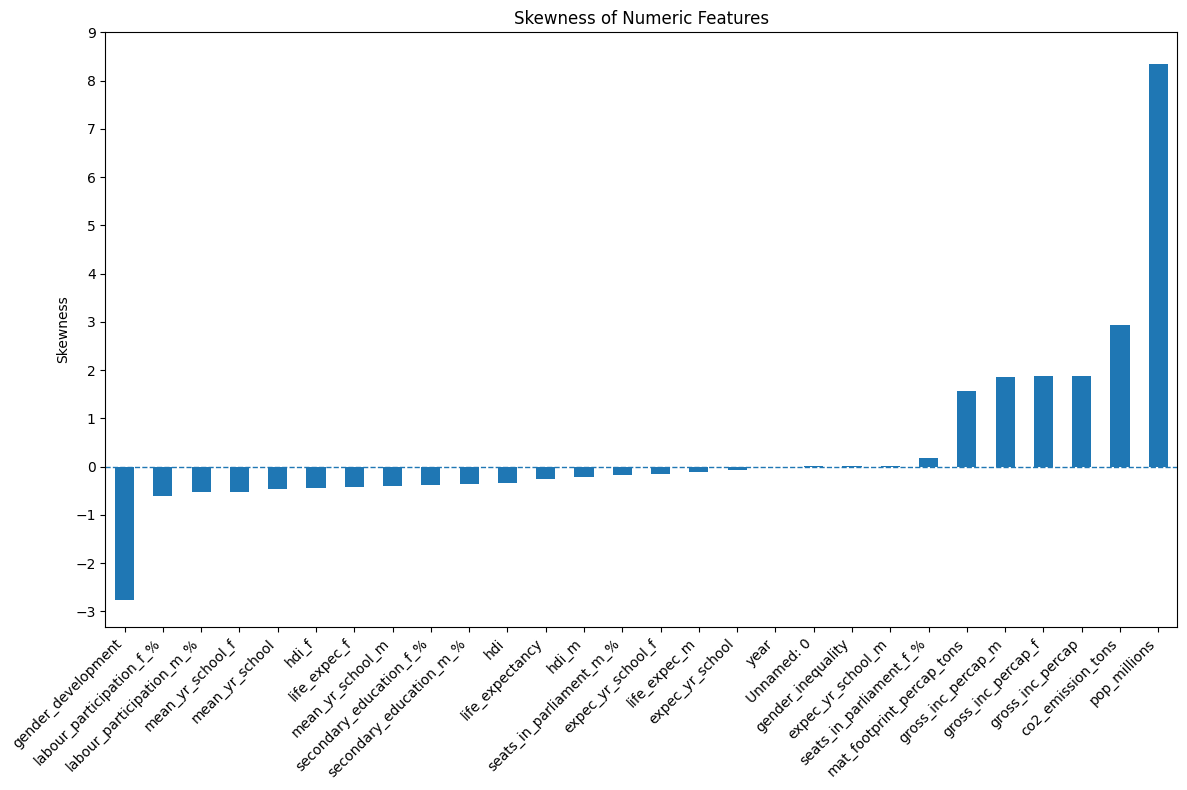

In [510]:
plot_skewness(hdi_2022_clean_df)


In [511]:
hdi_2022_df = impute_numeric_missing(hdi_2022_clean_df)

hdi_2022_df.head(10)

hdi_f: has 11 missing values
Imputing by mean method(skewness: -0.44)

hdi_m: has 11 missing values
Imputing by mean method(skewness: -0.23)

gross_inc_percap_f: has 11 missing values
Imputing by median method(skewness: 1.88)

gross_inc_percap_m: has 11 missing values
Imputing by median method(skewness: 1.86)

gender_development: has 11 missing values
Imputing by median method(skewness: -2.77)

gender_inequality: has 27 missing values
Imputing by mean method(skewness: 0.00)

secondary_education_f_%: has 15 missing values
Imputing by mean method(skewness: -0.39)

secondary_education_m_%: has 15 missing values
Imputing by mean method(skewness: -0.36)

seats_in_parliament_f_%: has 2 missing values
Imputing by mean method(skewness: 0.18)

seats_in_parliament_m_%: has 2 missing values
Imputing by mean method(skewness: -0.18)

labour_participation_f_%: has 11 missing values
Imputing by mean method(skewness: -0.61)

labour_participation_m_%: has 11 missing values
Imputing by mean method(skewn

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.6220,0.665000,7.042050,24.077040,27.215190,72.784810,23.330000,77.090000,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.9770,0.116000,82.249185,86.476634,35.714286,64.285714,56.080000,69.910000,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.8810,0.460000,42.910456,46.815170,7.005254,92.994746,17.570000,65.530000,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,0.707868,0.739864,85.838,81.430,12.783780,12.765060,12.810630,11.613440,11.522590,11.704380,54233.449480,9429.071505,16126.774970,0.9705,0.334711,81.718277,84.599998,46.428571,53.571429,49.973297,70.019341,4.593593,9.7815
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,12.167600,11.535400,12.909900,5.844292,4.462809,7.187960,5327.788251,4696.356687,5973.845631,0.9050,0.520000,21.339865,37.411946,33.636364,66.363636,74.730000,78.160000,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,0.707868,0.739864,81.645,76.507,15.512328,16.746290,14.350537,10.546230,10.344223,10.595975,18783.965360,9429.071505,16126.774970,0.9705,0.334711,61.225468,65.502580,31.428571,68.571429,49.973297,70.019341,6.401056,9.7815
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,72.851,18.979509,20.914900,17.130329,11.144080,11.391660,10.857980,22047.971310,16933.062910,27264.830910,0.9950,0.292000,73.591541,71.648085,44.376900,55.623100,52.080000,71.740000,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,67.866,14.405610,14.812910,14.022340,11.330300,11.321520,11.341190,15388.299760,13442.501330,17770.415300,1.0260,0.198000,96.001381,97.050957,35.514019,64.485981,62.800000,71.840000,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,81.708,21.080021,21.981430,20.193760,12.726820,12.810590,12.639710,49257.135200,41131.470850,57495.771580,0.9780,0.063000,94.580063,94.430069,44.493392,55.506608,62.310000,71.130000,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,80.150,16.367460,16.838499,15.922670,12.305714,12.048949,12.578872,56529.663290,41899.211240,71616.204300,0.9720,0.048000,100.000000,100.000000,40.983607,59.016393,56.550000,66.690000,7.399461,27.9621


In [512]:
print("Duplicate rows after dropping:")
print(hdi_2022_clean_df.duplicated().sum())

Duplicate rows after dropping:
0


In [513]:
print(f"HDI Statistics For 2022:")

hdi_stats_2022 = {
    'Mean': hdi_2022_clean_df['hdi'].mean(),
    'Median': hdi_2022_clean_df['hdi'].median(),
    'Std Dev': hdi_2022_clean_df['hdi'].std(),
    'Min': hdi_2022_clean_df['hdi'].min(),
    'Max': hdi_2022_clean_df['hdi'].max(),
    '25th Percentile': hdi_2022_clean_df['hdi'].quantile(0.25),
    '75th Percentile': hdi_2022_clean_df['hdi'].quantile(0.75)
}

for stat, value in hdi_stats_2022.items():
    print(f"{stat}: {value:.4f}")

# Complete Descriptive Statistics
print(f"\n\nComplete Descriptive Statistics 2022 for comparision:")

hdi_2022_clean_df.describe()

HDI Statistics For 2022:
Mean: 0.7237
Median: 0.7400
Std Dev: 0.1552
Min: 0.3800
Max: 0.9670
25th Percentile: 0.6020
75th Percentile: 0.8470


Complete Descriptive Statistics 2022 for comparision:


,Unnamed: 0,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
count,193.000000,193.0,193.000000,193.000000,193.000000,182.000000,182.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,182.000000,182.000000,182.000000,166.000000,178.000000,178.000000,191.000000,191.000000,182.000000,182.000000,192.000000,154.000000
mean,3232.119171,2022.0,0.723741,71.842145,41.007787,0.707868,0.739864,74.519244,69.258114,13.535355,13.846993,13.278585,9.016788,8.756234,9.323164,21057.293224,16183.651777,26379.803361,0.948934,0.334711,61.225468,65.502580,25.223914,74.776086,49.973297,70.019341,4.346352,13.460002
std,1871.490229,0.0,0.155177,7.863264,149.724526,0.166556,0.144871,7.933207,7.875449,3.028719,3.405966,2.753712,3.223496,3.547173,2.928910,22530.778836,17960.820635,27315.068153,0.071218,0.194808,30.678128,27.347166,12.260917,12.260917,15.148300,10.275423,5.569913,11.185327
min,33.000000,2022.0,0.380000,52.997000,0.011312,0.219081,0.425211,53.968000,50.319000,5.634770,4.510310,6.738390,1.341352,0.885770,1.772790,690.660758,149.971667,789.456147,0.456000,0.009000,2.578340,4.483990,0.294118,45.283019,5.840000,29.630000,0.038126,1.180900
25%,1617.000000,2022.0,0.602000,65.913000,2.119844,0.577918,0.620538,68.918000,63.361000,11.586280,11.643529,11.486730,6.518158,5.648159,7.185002,4781.692046,2987.880410,5996.036021,0.926000,0.177250,33.830297,40.989481,16.733333,66.520468,42.332500,65.102500,0.760414,4.680300
50%,3234.000000,2022.0,0.740000,72.229000,8.939617,0.732460,0.749939,75.813000,69.189000,13.328010,13.957140,13.072574,9.423700,9.559819,9.469866,12360.816300,9429.071505,16126.774970,0.970500,0.351000,67.455002,69.723161,24.941176,75.058824,52.510000,70.445000,2.535291,9.781500
75%,4851.000000,2022.0,0.847000,77.905000,30.547580,0.839403,0.853506,80.497000,75.313000,15.661749,16.402411,15.202730,11.656957,11.767911,11.723640,32171.246060,25963.609683,40772.618098,0.991000,0.493250,89.697935,92.038111,33.479532,83.266667,59.577500,76.192500,5.660485,18.010050
max,6435.000000,2022.0,0.967000,84.820000,1425.887337,0.957148,0.977383,87.832000,83.019000,21.080021,21.981430,20.193760,14.255940,13.990300,14.535050,146673.241500,114828.834300,179045.068600,1.064000,0.820000,100.000000,100.000000,54.716981,99.705882,82.940000,98.580000,39.884274,63.591200


In [514]:
def max_min_hdi_finder(df):
    max_value_2022 = df.loc[df['hdi'].idxmax()]
    min_value_2022 = df.loc[df['hdi'].idxmin()]

    print(
        f"{max_value_2022['country']} has the highest HDI for 2022\n"
        f"with an HDI value of {max_value_2022['hdi']:.3f}"
        )

    print(
        f"\n{min_value_2022['country']} has the lowest HDI for 2022\n"
        f"with an HDI value of {min_value_2022['hdi']:.3f}"
    )

country_stats_hdi_2022 = max_min_hdi_finder(hdi_2022_clean_df)

Switzerland has the highest HDI for 2022
with an HDI value of 0.967

Somalia has the lowest HDI for 2022
with an HDI value of 0.380


In [515]:
higher_hdi_dataset_2022 = (
    hdi_2022_clean_df.loc[hdi_2022_clean_df['hdi'] > 0.800]
)

gni_sort_dataset_2022 = higher_hdi_dataset_2022.sort_values(
    by='gross_inc_percap', ascending=False
)
gni_sort_dataset_2022.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,83.019,15.466400,14.518240,16.434999,12.351169,12.090864,14.049712,146673.24150,114828.83430,179045.06860,0.949,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,80.626,13.264270,15.289560,12.649090,10.131722,11.796383,9.737610,95944.37754,47963.67663,114134.84230,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,81.981,16.902731,17.034019,16.810640,11.924880,11.627060,12.254710,88761.14559,76610.86780,99844.23650,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,81.017,19.126101,19.475800,18.771580,11.656957,11.863226,11.437631,87467.51391,66876.42142,108423.61080,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,80.445,14.197050,14.315570,14.088360,12.960081,12.934179,12.962670,78554.23640,66697.04897,90255.76002,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,77.720,17.208139,19.753281,16.379900,12.773750,12.588370,12.905890,74103.71494,51509.56703,84087.84953,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,82.484,16.583731,16.677860,16.498199,13.904066,13.549473,14.268536,69432.78669,56927.80503,82109.48430,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,81.718,18.638460,19.521360,17.803841,13.062343,13.210113,12.912692,69189.76165,61067.47743,77164.33022,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,75.479,16.412741,17.262751,15.585690,13.575500,13.653570,13.493290,65564.93798,53469.38514,77898.33045,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
2474,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,81.754,17.849590,17.872049,17.841379,12.347770,11.995980,12.788720,62485.50516,51562.96012,75269.83474,0.972,NaN,77.866913,84.067802,NaN,NaN,52.91,64.71,4.373242,NaN


In [516]:
undp_contitions = [-np.inf, 0.549, 0.699, 0.799, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']

hdi_2022_clean_df['HDI_category'] = pd.cut(
    hdi_2022_clean_df['hdi'], bins=undp_contitions, labels=labels
)

hdi_2022_clean_df[['country', 'hdi', 'HDI_category']].head(10)


,country,hdi,HDI_category
32,Afghanistan,0.462,Low
65,Albania,0.789,High
98,Algeria,0.745,High
131,Andorra,0.884,Very High
164,Angola,0.591,Medium
197,Antigua and Barbuda,0.826,Very High
230,Argentina,0.849,Very High
263,Armenia,0.786,High
296,Australia,0.946,Very High
329,Austria,0.926,Very High


In [517]:
hdi_2022_clean_df.to_csv('HDI_category_added.csv', index = False)

print("Successfully stored the updated HDI in HDI_category_added.csv")

Successfully stored the updated HDI in HDI_category_added.csv


## 3.2 Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)

### Task 1: Data Extraction and Saving:

#### 1.1: Filtering the dataset to only include years 2020, 2021 and 2022.

In [518]:
filter_yr = [2020, 2021, 2022]

hdi_2020_22_df = hdi_dataset[hdi_dataset['year'].isin(filter_yr)].copy()

hdi_2020_22_df.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
30,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,59.866,10.705385,8.053257,13.228449,2.841610,2.050737,3.407107,1986.803772,670.996249,3275.057369,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
31,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,58.915,10.705385,8.053257,13.228449,2.985070,2.311080,3.401310,1534.135377,618.868288,2430.862265,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
63,64,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,74.632,14.759720,15.019560,14.492910,10.121144,9.811468,10.433855,13069.127700,11153.644450,14983.695140,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
64,65,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,74.087,14.571750,14.849250,14.289420,10.121144,9.811468,10.433855,14399.780470,12550.782890,16252.408730,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
96,97,DZA,Algeria,2020,0.730,74.453,43.451666,0.666724,0.758643,75.912,73.082,15.302207,15.999701,14.634753,6.987444,6.490568,7.481537,10634.883980,3709.098381,17305.912600,0.879,0.396,42.910456,46.815170,21.061360,78.938640,17.53,65.59,3.909926,8.7299
97,98,DZA,Algeria,2021,0.740,76.377,44.177968,0.677675,0.768169,77.959,74.879,15.395043,16.131940,14.689317,6.987444,6.490568,7.481537,10823.118130,3786.828917,17604.030850,0.882,0.457,42.910456,46.815170,7.481752,92.518248,17.57,65.53,4.079540,8.6074
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
129,130,AND,Andorra,2020,0.843,79.023,0.077700,NaN,NaN,83.192,75.763,11.911930,11.877110,11.944830,11.260993,11.178576,11.343280,48026.390490,NaN,NaN,NaN,NaN,78.306798,80.787392,46.428571,53.571429,NaN,NaN,4.809910,NaN


#### 1. 2: Saving the filtered dataset as "HDI problem1B.csv".

In [519]:
hdi_2020_22_df.to_csv('HDI problem1B.csv', index = False)

### Task 2: Data Cleaning

#### 2. 1: Checking for missing values in essential columns:

* HDI
* Country
* Year

In [520]:
specific_null_check_2020_22 = (
    hdi_2020_22_df[['hdi', 'country', 'year']].
    isnull().sum()
)

print("Missing values in 'hdi','country','year' for filtered dataset 2020-22:")
specific_null_check_2020_22

Missing values in 'hdi','country','year' for filtered dataset 2020-22:


,0
hdi,8
country,0
year,0


#### 2.2: Identifying Issues in the dataset

* Missing or null values,

In [521]:
# Missing values in all columns
null_check_2020_22 = hdi_2020_22_df.isnull().sum()

print("Missing values(Null) in filtered dataset 2020-22:")
null_check_2020_22

Missing values(Null) in filtered dataset 2020-22:


,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,8
life_expectancy,0
pop_millions,0
hdi_f,41
hdi_m,41
life_expec_f,0


* Any duplicate rows,

In [522]:
check_duplicates_2020_22 = hdi_2020_22_df.duplicated().sum()

print("Total number of duplicate values in filtered dataset 2020-22:")
check_duplicates_2020_22


Total number of duplicate values in filtered dataset 2020-22:


np.int64(0)

* Numeric columns stored as text

In [523]:
hdi_2020_22_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 618 entries, 30 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 618 non-null    int64  
 1   iso3                       618 non-null    object 
 2   country                    618 non-null    object 
 3   year                       618 non-null    int64  
 4   hdi                        610 non-null    float64
 5   life_expectancy            618 non-null    float64
 6   pop_millions               618 non-null    float64
 7   hdi_f                      577 non-null    float64
 8   hdi_m                      577 non-null    float64
 9   life_expec_f               618 non-null    float64
 10  life_expec_m               618 non-null    float64
 11  expec_yr_school            613 non-null    float64
 12  expec_yr_school_f          613 non-null    float64
 13  expec_yr_school_m          613 non-null    float64
 1

* Containing Invalid values (e.g., “–”).

In [524]:
invalid_values_hdi_2020_22 = detect_invalid_values(hdi_2020_22_df)
print(f"Total invalid values in each columns: \n{invalid_values_hdi_2020_22}")

Total invalid values in each columns: 
{}


#### 2.3: Applying cleaning steps:

2.3.1: Handling missing values (dropping or imputing),

In [525]:
original_count_2020_22 = len(hdi_2020_22_df)

hdi_2020_22_df = hdi_2020_22_df.dropna(subset=['hdi'])

removed_count_2020_22 = original_count_2020_22 - len(hdi_2020_22_df)

print(f"Data Cleaning Report:")
print(f"  Original rows: {original_count_2020_22}")
print(f"  After cleaning: {len(hdi_2020_22_df)}")
print(f"  Rows removed: {removed_count_2020_22}")

hdi_2020_22_df.head(10)

Data Cleaning Report:
  Original rows: 618
  After cleaning: 610
  Rows removed: 8


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
30,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,59.866,10.705385,8.053257,13.228449,2.841610,2.050737,3.407107,1986.803772,670.996249,3275.057369,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
31,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,58.915,10.705385,8.053257,13.228449,2.985070,2.311080,3.401310,1534.135377,618.868288,2430.862265,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
63,64,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,74.632,14.759720,15.019560,14.492910,10.121144,9.811468,10.433855,13069.127700,11153.644450,14983.695140,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
64,65,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,74.087,14.571750,14.849250,14.289420,10.121144,9.811468,10.433855,14399.780470,12550.782890,16252.408730,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
96,97,DZA,Algeria,2020,0.730,74.453,43.451666,0.666724,0.758643,75.912,73.082,15.302207,15.999701,14.634753,6.987444,6.490568,7.481537,10634.883980,3709.098381,17305.912600,0.879,0.396,42.910456,46.815170,21.061360,78.938640,17.53,65.59,3.909926,8.7299
97,98,DZA,Algeria,2021,0.740,76.377,44.177968,0.677675,0.768169,77.959,74.879,15.395043,16.131940,14.689317,6.987444,6.490568,7.481537,10823.118130,3786.828917,17604.030850,0.882,0.457,42.910456,46.815170,7.481752,92.518248,17.57,65.53,4.079540,8.6074
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
129,130,AND,Andorra,2020,0.843,79.023,0.077700,NaN,NaN,83.192,75.763,11.911930,11.877110,11.944830,11.260993,11.178576,11.343280,48026.390490,NaN,NaN,NaN,NaN,78.306798,80.787392,46.428571,53.571429,NaN,NaN,4.809910,NaN


In [526]:
hdi_2020_22_df = impute_numeric_missing(hdi_2020_22_df)

hdi_f: has 33 missing values
Imputing by mean method(skewness: -0.41)

hdi_m: has 33 missing values
Imputing by mean method(skewness: -0.20)

gross_inc_percap_f: has 33 missing values
Imputing by median method(skewness: 2.01)

gross_inc_percap_m: has 33 missing values
Imputing by median method(skewness: 1.92)

gender_development: has 33 missing values
Imputing by median method(skewness: -2.64)

gender_inequality: has 81 missing values
Imputing by mean method(skewness: -0.01)

secondary_education_f_%: has 45 missing values
Imputing by mean method(skewness: -0.38)

secondary_education_m_%: has 45 missing values
Imputing by mean method(skewness: -0.36)

seats_in_parliament_f_%: has 6 missing values
Imputing by mean method(skewness: 0.22)

seats_in_parliament_m_%: has 6 missing values
Imputing by mean method(skewness: -0.22)

labour_participation_f_%: has 33 missing values
Imputing by mean method(skewness: -0.59)

labour_participation_m_%: has 33 missing values
Imputing by mean method(skew

2.3.2: Converting data types appropriately

*   Since there is no discrepancy between the data types of columns in the dataset, skipping unneccessary conversion of data types for this dataset.




2.3.3: Removing duplicate entries

In [527]:
hdi_2020_22_df = hdi_2020_22_df.drop_duplicates()

print("Duplicate rows after dropping:")
print(hdi_2020_22_df.duplicated().sum())

Duplicate rows after dropping:
0


2.3.4: Ensuring countries and years column only consists of valid naming conventions.

In [528]:
hdi_2020_22_clean_df = clean_country_data(hdi_2020_22_df)

Rows removed: 33
Remaining rows: 577
Unique countries: 193

Verification - Sample of cleaned country names:
First few countries: ['Afghanistan' 'Albania' 'Algeria']

Last few countries: ['Yemen' 'Zambia' 'Zimbabwe']


### Task 3: Visualization Tasks:

### A. Line Chart — HDI Trend (Country-Level):

* Select any five countries (or five countries from a region of your choice).
* Plot HDI values for each country across the years 2020, 2021, and 2022.
* Ensure the chart includes appropriate axis labels, a legend, and an informative caption.

In [529]:
sa_countries = ['Nepal', 'India', 'Bhutan', 'Bangladesh', 'Sri Lanka']

plottrend_df = (
    hdi_2020_22_clean_df[hdi_2020_22_clean_df['country'].isin(sa_countries)]
)


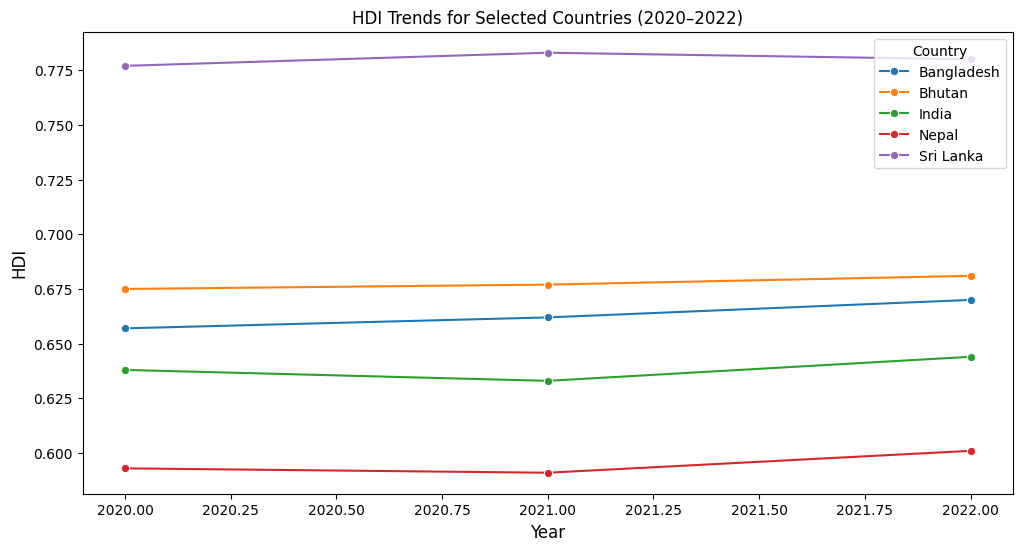

In [530]:
plt.figure(figsize=(12,6))

sns.lineplot(
    data=plottrend_df,
    x='year',
    y='hdi',
    hue='country',
    marker='o',
    palette='tab10'
)

plt.xlabel("Year", fontsize=12)
plt.ylabel("HDI", fontsize=12)
plt.title("HDI Trends for Selected Countries (2020–2022)")
plt.legend(title="Country")
plt.show()


### B. Generate Visualizations:

#### B. I: Bar Chart: Average HDI by Region (2020–2022)

* Group the dataset by Region and Year.
* Compute the mean HDI for each region-year pair.
* Plot a bar chart comparing average HDI across regions for each year.
* Label axes clearly and include a descriptive title.

In [531]:
if 'region' not in hdi_2020_22_clean_df.columns:
  print("Region variable not available in the dataset")

Region variable not available in the dataset


In the given dataset, Region column is does not exist.

But, There were unusual entries in the country column i. e.

unusual_entries = [
    "Arab States",
    "East Asia and the Pacific",
    "Europe and Central Asia",
    "Latin America and the Caribbean",
    "South Asia",
    "Sub-Saharan Africa"
]

But, some regions are still missing such as North America.

So, instead of of searching for a region column, creating a region with manual country: region mapping would be optimal

In [532]:
# Manual country to region mapping

country_to_region = {
    # Africa - North Africa
    "Algeria": "North Africa",
    "Egypt": "North Africa",
    "Libya": "North Africa",
    "Morocco": "North Africa",
    "Sudan": "North Africa",
    "Tunisia": "North Africa",

    # Africa - West Africa
    "Benin": "West Africa",
    "Burkina Faso": "West Africa",
    "Cabo Verde": "West Africa",
    "Côte d'Ivoire": "West Africa",
    "Gambia": "West Africa",
    "Ghana": "West Africa",
    "Guinea": "West Africa",
    "Guinea-Bissau": "West Africa",
    "Liberia": "West Africa",
    "Mali": "West Africa",
    "Mauritania": "West Africa",
    "Niger": "West Africa",
    "Nigeria": "West Africa",
    "Senegal": "West Africa",
    "Sierra Leone": "West Africa",
    "Togo": "West Africa",

    # Africa - Central Africa
    "Cameroon": "Central Africa",
    "Central African Republic": "Central Africa",
    "Chad": "Central Africa",
    "Congo": "Central Africa",
    "Congo (Democratic Republic of the)": "Central Africa",
    "Equatorial Guinea": "Central Africa",
    "Gabon": "Central Africa",
    "Sao Tome and Principe": "Central Africa",

    # Africa - East Africa
    "Burundi": "East Africa",
    "Comoros": "East Africa",
    "Djibouti": "East Africa",
    "Eritrea": "East Africa",
    "Ethiopia": "East Africa",
    "Kenya": "East Africa",
    "Madagascar": "East Africa",
    "Malawi": "East Africa",
    "Mauritius": "East Africa",
    "Mozambique": "East Africa",
    "Rwanda": "East Africa",
    "Seychelles": "East Africa",
    "Somalia": "East Africa",
    "South Sudan": "East Africa",
    "Tanzania (United Republic of)": "East Africa",
    "Uganda": "East Africa",
    "Zambia": "East Africa",
    "Zimbabwe": "East Africa",

    # Africa - Southern Africa
    "Angola": "Southern Africa",
    "Botswana": "Southern Africa",
    "Eswatini (Kingdom of)": "Southern Africa",
    "Lesotho": "Southern Africa",
    "Namibia": "Southern Africa",
    "South Africa": "Southern Africa",

    # Asia - East Asia
    "China": "East Asia",
    "Hong Kong, China (SAR)": "East Asia",
    "Japan": "East Asia",
    "Korea (Republic of)": "East Asia",
    "Mongolia": "East Asia",

    # Asia - Southeast Asia
    "Brunei Darussalam": "Southeast Asia",
    "Cambodia": "Southeast Asia",
    "Indonesia": "Southeast Asia",
    "Lao People's Democratic Republic": "Southeast Asia",
    "Malaysia": "Southeast Asia",
    "Myanmar": "Southeast Asia",
    "Philippines": "Southeast Asia",
    "Singapore": "Southeast Asia",
    "Thailand": "Southeast Asia",
    "Timor-Leste": "Southeast Asia",
    "Viet Nam": "Southeast Asia",

    # Asia - South Asia
    "Afghanistan": "South Asia",
    "Bangladesh": "South Asia",
    "Bhutan": "South Asia",
    "India": "South Asia",
    "Maldives": "South Asia",
    "Nepal": "South Asia",
    "Pakistan": "South Asia",
    "Sri Lanka": "South Asia",

    # Asia - Central Asia
    "Kazakhstan": "Central Asia",
    "Kyrgyzstan": "Central Asia",
    "Tajikistan": "Central Asia",
    "Turkmenistan": "Central Asia",
    "Uzbekistan": "Central Asia",

    # Asia - Western Asia (Middle East)
    "Armenia": "Western Asia",
    "Azerbaijan": "Western Asia",
    "Bahrain": "Western Asia",
    "Cyprus": "Western Asia",
    "Georgia": "Western Asia",
    "Iran (Islamic Republic of)": "Western Asia",
    "Iraq": "Western Asia",
    "Israel": "Western Asia",
    "Jordan": "Western Asia",
    "Kuwait": "Western Asia",
    "Lebanon": "Western Asia",
    "Oman": "Western Asia",
    "Palestine, State of": "Western Asia",
    "Qatar": "Western Asia",
    "Saudi Arabia": "Western Asia",
    "Syrian Arab Republic": "Western Asia",
    "Türkiye": "Western Asia",
    "United Arab Emirates": "Western Asia",
    "Yemen": "Western Asia",

    # Europe - Northern Europe
    "Denmark": "Northern Europe",
    "Estonia": "Northern Europe",
    "Finland": "Northern Europe",
    "Iceland": "Northern Europe",
    "Ireland": "Northern Europe",
    "Latvia": "Northern Europe",
    "Lithuania": "Northern Europe",
    "Norway": "Northern Europe",
    "Sweden": "Northern Europe",
    "United Kingdom": "Northern Europe",

    # Europe - Western Europe
    "Austria": "Western Europe",
    "Belgium": "Western Europe",
    "France": "Western Europe",
    "Germany": "Western Europe",
    "Liechtenstein": "Western Europe",
    "Luxembourg": "Western Europe",
    "Netherlands": "Western Europe",
    "Switzerland": "Western Europe",

    # Europe - Southern Europe
    "Albania": "Southern Europe",
    "Andorra": "Southern Europe",
    "Bosnia and Herzegovina": "Southern Europe",
    "Croatia": "Southern Europe",
    "Greece": "Southern Europe",
    "Italy": "Southern Europe",
    "Malta": "Southern Europe",
    "Montenegro": "Southern Europe",
    "North Macedonia": "Southern Europe",
    "Portugal": "Southern Europe",
    "San Marino": "Southern Europe",
    "Serbia": "Southern Europe",
    "Slovenia": "Southern Europe",
    "Spain": "Southern Europe",

    # Europe - Eastern Europe
    "Belarus": "Eastern Europe",
    "Bulgaria": "Eastern Europe",
    "Czechia": "Eastern Europe",
    "Hungary": "Eastern Europe",
    "Moldova (Republic of)": "Eastern Europe",
    "Poland": "Eastern Europe",
    "Romania": "Eastern Europe",
    "Russian Federation": "Eastern Europe",
    "Slovakia": "Eastern Europe",
    "Ukraine": "Eastern Europe",

    # Americas - North America
    "Canada": "North America",
    "Mexico": "North America",
    "United States": "North America",

    # Americas - Central America
    "Belize": "Central America",
    "Costa Rica": "Central America",
    "El Salvador": "Central America",
    "Guatemala": "Central America",
    "Honduras": "Central America",
    "Nicaragua": "Central America",
    "Panama": "Central America",

    # Americas - Caribbean
    "Antigua and Barbuda": "Caribbean",
    "Bahamas": "Caribbean",
    "Barbados": "Caribbean",
    "Cuba": "Caribbean",
    "Dominica": "Caribbean",
    "Dominican Republic": "Caribbean",
    "Grenada": "Caribbean",
    "Haiti": "Caribbean",
    "Jamaica": "Caribbean",
    "Saint Kitts and Nevis": "Caribbean",
    "Saint Lucia": "Caribbean",
    "Saint Vincent and the Grenadines": "Caribbean",
    "Trinidad and Tobago": "Caribbean",

    # Americas - South America
    "Argentina": "South America",
    "Bolivia (Plurinational State of)": "South America",
    "Brazil": "South America",
    "Chile": "South America",
    "Colombia": "South America",
    "Ecuador": "South America",
    "Guyana": "South America",
    "Paraguay": "South America",
    "Peru": "South America",
    "Suriname": "South America",
    "Uruguay": "South America",
    "Venezuela (Bolivarian Republic of)": "South America",

    # Oceania - Australia and New Zealand
    "Australia": "Australia and New Zealand",
    "New Zealand": "Australia and New Zealand",

    # Oceania - Melanesia
    "Fiji": "Melanesia",
    "Papua New Guinea": "Melanesia",
    "Solomon Islands": "Melanesia",
    "Vanuatu": "Melanesia",

    # Oceania - Micronesia
    "Kiribati": "Micronesia",
    "Marshall Islands": "Micronesia",
    "Micronesia (Federated States of)": "Micronesia",
    "Nauru": "Micronesia",
    "Palau": "Micronesia",

    # Oceania - Polynesia
    "Samoa": "Polynesia",
    "Tonga": "Polynesia",
    "Tuvalu": "Polynesia",
}

In [533]:
# Adding region column
hdi_2020_22_df['region'] = hdi_2020_22_df['country'].map(country_to_region)

# Check the result
hdi_2020_22_df.head()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,region
30,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,59.866,10.705385,8.053257,13.228449,2.841610,2.050737,3.407107,1986.803772,670.996249,3275.057369,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554,South Asia
31,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,58.915,10.705385,8.053257,13.228449,2.985070,2.311080,3.401310,1534.135377,618.868288,2430.862265,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351,South Asia
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809,South Asia
63,64,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,74.632,14.759720,15.019560,14.492910,10.121144,9.811468,10.433855,13069.127700,11153.644450,14983.695140,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704,Southern Europe
64,65,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,74.087,14.571750,14.849250,14.289420,10.121144,9.811468,10.433855,14399.780470,12550.782890,16252.408730,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865,Southern Europe


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,region
30,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,59.866,10.705385,8.053257,13.228449,2.841610,2.050737,3.407107,1986.803772,670.996249,3275.057369,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554,South Asia
31,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,58.915,10.705385,8.053257,13.228449,2.985070,2.311080,3.401310,1534.135377,618.868288,2430.862265,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351,South Asia
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809,South Asia
63,64,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,74.632,14.759720,15.019560,14.492910,10.121144,9.811468,10.433855,13069.127700,11153.644450,14983.695140,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704,Southern Europe
64,65,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,74.087,14.571750,14.849250,14.289420,10.121144,9.811468,10.433855,14399.780470,12550.782890,16252.408730,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865,Southern Europe


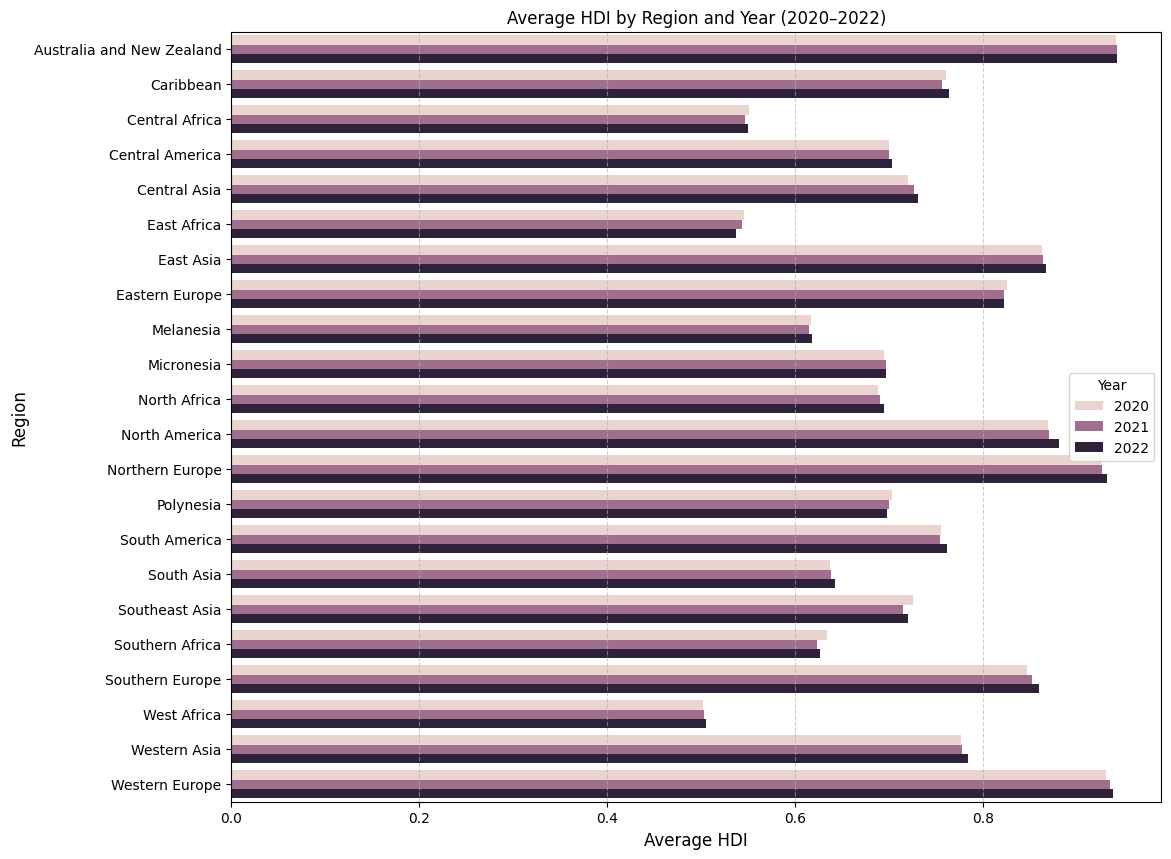

In [534]:
region_avg = (
    hdi_2020_22_df
    .groupby(['region', 'year'])['hdi']
    .mean()
    .reset_index()
)

display(hdi_2020_22_df.head())

plt.figure(figsize=(12,10))

sns.barplot(
    data=region_avg,
    x='hdi',
    y='region',
    hue='year',
)
plt.xlabel("Average HDI", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.title("Average HDI by Region and Year (2020–2022)")
plt.legend(title="Year")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Additionally, for analysising on countries with HDI "Region V HDI" is not optimal. Hence, a new graph creation "Country V HDI" would help with analysing for specific conditions.

,country,year,hdi
0,Afghanistan,2020,0.488
1,Afghanistan,2021,0.473
2,Afghanistan,2022,0.462
3,Albania,2020,0.784
4,Albania,2021,0.785


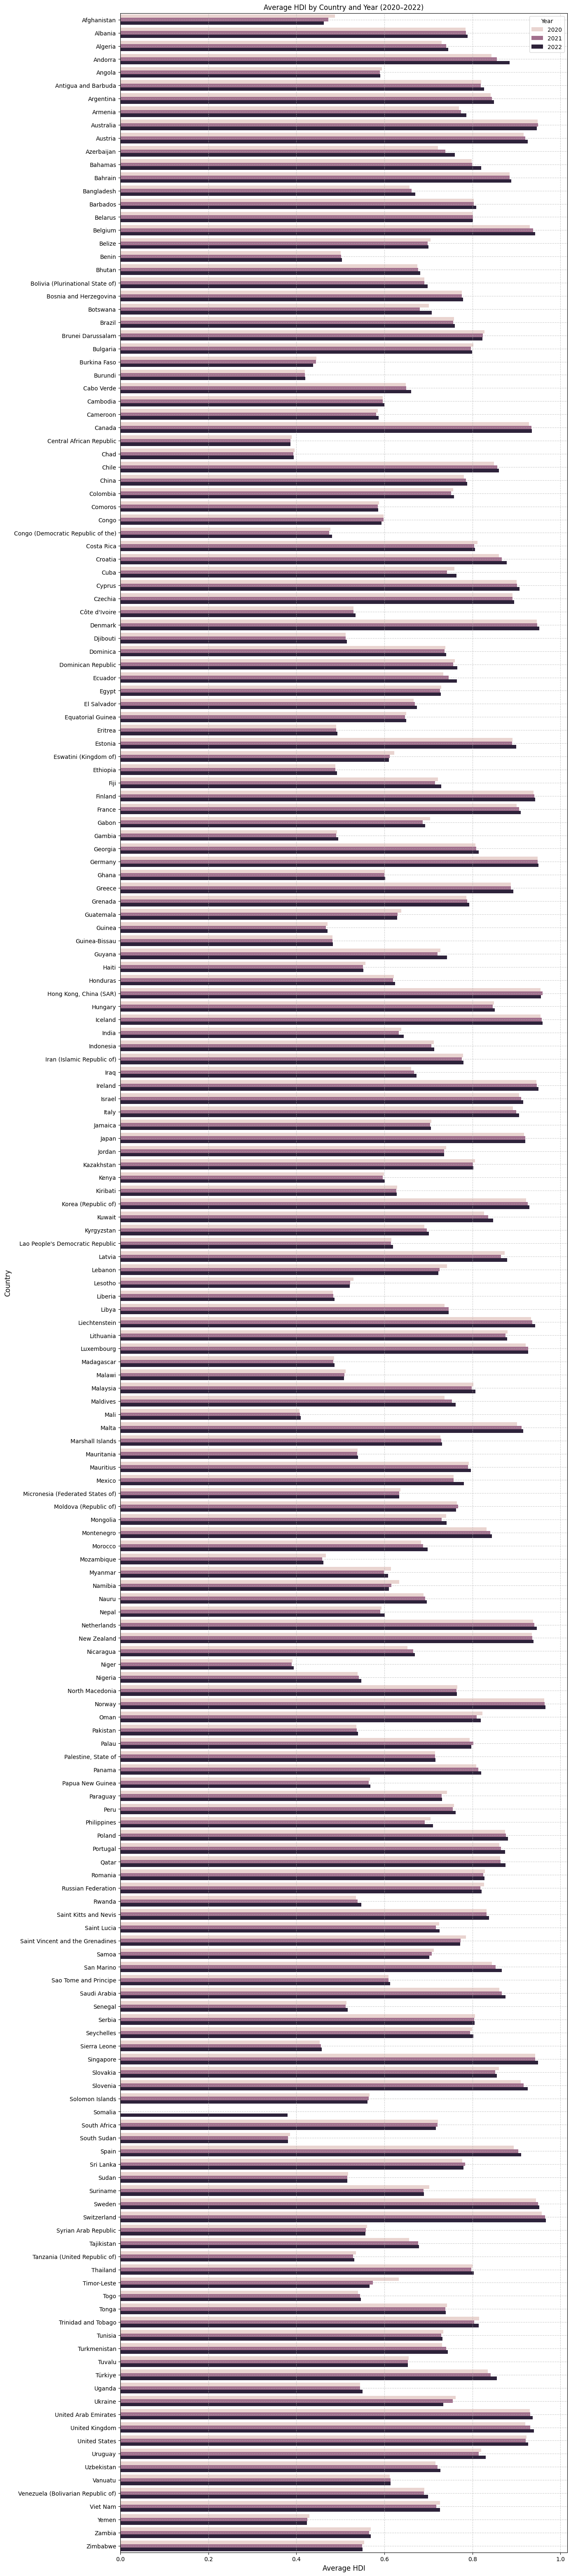

In [535]:
country_avg = (
    hdi_2020_22_clean_df
    .groupby(['country', 'year'])['hdi']
    .mean()
    .reset_index()
)

display(country_avg.head())

plt.figure(figsize=(14, 80))


sns.barplot(
    data=country_avg,
    x='hdi',
    y='country',
    hue='year',
)
plt.xlabel("Average HDI", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.title("Average HDI by Country and Year (2020–2022)")
plt.legend(title="Year")
plt.grid(linestyle='--', alpha=0.6)
plt.show()

### B. II: Box Plot: HDI Distribution for 2020, 2021, and 2022
* Filter the dataset for the years 2020, 2021, and 2022.
* Create a box plot showing HDI spread for each of the three years.
* Include titles and axis labels.
* Comment briefly on distribution differences.

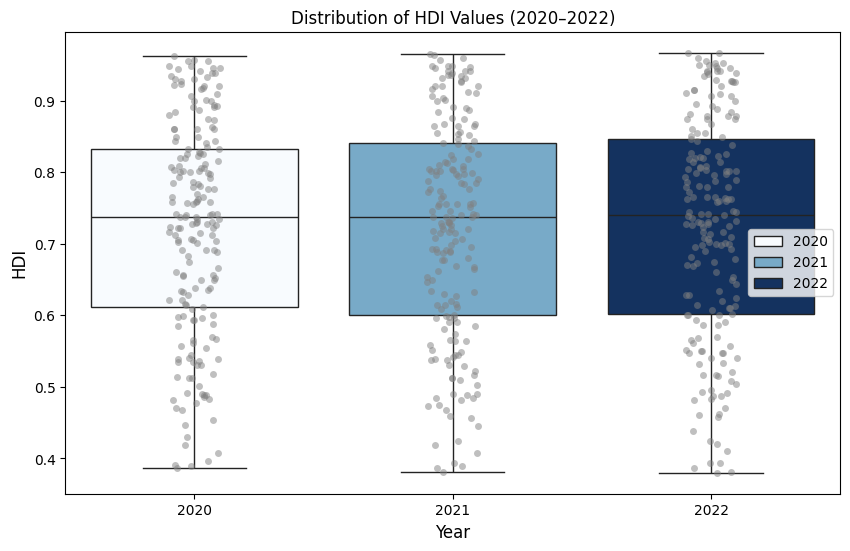

In [536]:
plt.figure(figsize=(10,6))

# Plotting a box plot for HDI distribution for 2020, 2021, and 2022
sns.boxplot(
    data=hdi_2020_22_clean_df,
    x='year',
    y='hdi',
    hue='year',
    palette='Blues'
)

# plotting individual data points for better visualization
sns.stripplot(
    data=hdi_2020_22_clean_df,
    x='year',
    y='hdi',
    color='grey',
    alpha = 0.5,
  )

plt.xlabel("Year", fontsize=12)
plt.ylabel("HDI", fontsize=12)
plt.title("Distribution of HDI Values (2020–2022)")
plt.show()



### B. III: Scatter Plot: HDI vs. GNI per Capita
* Check if the dataset contains a column for GNI per Capita.
* If available:
    * Create a scatter plot using HDI as the dependent variable.
    * Use GNI per Capita on the x-axis.
    * Add a regression line (optional).
* If the variable is missing, write:
"GNI per Capita variable not available in the dataset."

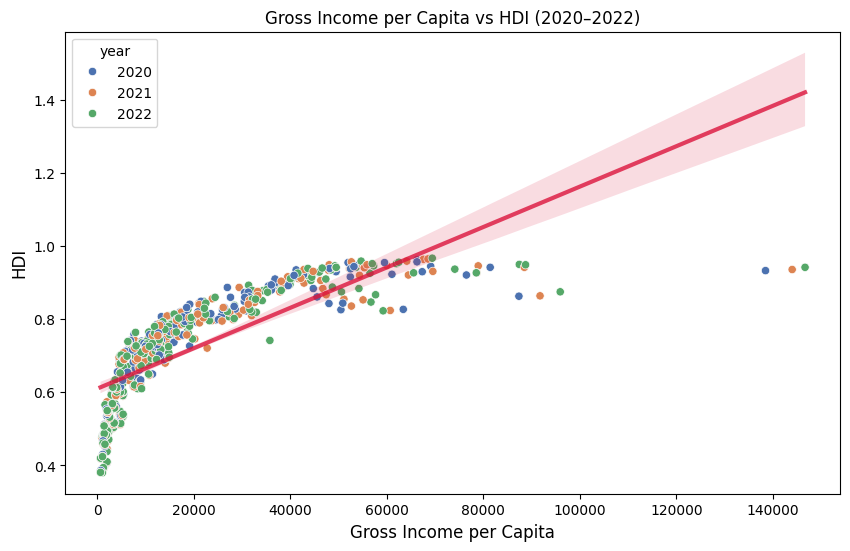

In [537]:
plt.figure(figsize=(10,6))

# Plotting a scatterplot using HDI as the dependent variable
sns.scatterplot(
    data = hdi_2020_22_clean_df,
    x ='gross_inc_percap',
    y = 'hdi',
    hue = 'year',
    palette = 'deep'
)

# Optional: Adding a regression line

sns.regplot(
    data=hdi_2020_22_clean_df,
    x='gross_inc_percap',
    y='hdi',
    scatter=False,
    color='crimson',
    line_kws={'linewidth': 3, 'alpha': 0.8}
)

plt.xlabel("Gross Income per Capita", fontsize=12)
plt.ylabel("HDI", fontsize=12)
plt.title("Gross Income per Capita vs HDI (2020–2022)")
plt.show()

### Task 4. Short Analysis Questions:
* Which countries show the greatest improvement in HDI from 2020 to 2022?
* Did any countries experience a decline in HDI? Provide possible reasons.
* Which region has the highest and lowest average HDI across these three years?
* Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during
this period.

#### Answers:



1.   Countries that showed the significant improvement in HDI from 2020 to 2022:

  * Central Asia:
  * North America:
  * Souther Europe:
  * Dominic Republic
2.   Yes, countries experienced a decline in HDI.

  * Possible reasons:
    * Armed conflicts and civil wars
    * Economic collapse
    * Political instability
    * Covid-19 pandemic
    * Climate-related disasters
    * Humanitarian crises

3. Regions with the highest average HDI accross three years.

    * Australia and New zeland
    * Western Europe
    * Northern Europe
    * Northern America

    Regions with the lowest average HDI accross three years.

    * Central Africa
    * West Africa
    * East Africa
  
  4. Reasons for COVID-19 affecting HDI trends during 2020-2022:

  * Life Expectency
  * Lack of Education
  * Income
    





# Problem 2: Advanced HDI Exploration

## 4.1 Problem - 1A - Single Year HDI Exploration (Latest Year: 2022)

### Task 1: Create South Asia Subset:

* Define the list of South Asian countries: ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"].
* Filter the HDI dataset to include only these countries.
* Save the filtered dataset as HDI SouthAsia.csv and include this file in the final submission.

In [538]:
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

south_asia_df = hdi_dataset[hdi_dataset['country'].isin(south_asia_countries)]

print(
    f"{len(south_asia_df)} entries found out of "
    f"{len(south_asia_countries)} South Asian countries."
 )

south_asia_df.to_csv('HDI_SouthAsia.csv', index=False)
print("Successfully Saved the updated dataset in HDI_SouthAsia.csv")

264 entries found out of 8 South Asian countries.
Successfully Saved the updated dataset in HDI_SouthAsia.csv


In [539]:
essential_columns = [
    'country',
    'hdi',
    'life_expectancy',
    'gross_inc_percap',
    'gender_development'
]

south_asia_df[essential_columns].isnull().sum()

,0
country,0
hdi,25
life_expectancy,0
gross_inc_percap,0
gender_development,43


Since this section of problems will be conducted in

Essential columns = essential_columns = [
    'country',
    'hdi',
    'life_expectancy',
    'gross_inc_percap',
    'gender_development'
]

Performing data wranggling process to remove noises.

In [540]:
numeric_cols = [
    'hdi',
    'life_expectancy',
    'gross_inc_percap',
    'gender_development'
]

south_asia_df = impute_numeric_missing(south_asia_df)

hdi: has 25 missing values
Imputing by mean method(skewness: 0.03)

hdi_f: has 43 missing values
Imputing by mean method(skewness: 0.09)

hdi_m: has 43 missing values
Imputing by mean method(skewness: 0.27)

expec_yr_school: has 5 missing values
Imputing by mean method(skewness: -0.36)

expec_yr_school_f: has 5 missing values
Imputing by mean method(skewness: -0.18)

expec_yr_school_m: has 5 missing values
Imputing by mean method(skewness: -0.47)

mean_yr_school: has 20 missing values
Imputing by mean method(skewness: 0.98)

mean_yr_school_f: has 20 missing values
Imputing by median method(skewness: 1.03)

mean_yr_school_m: has 20 missing values
Imputing by mean method(skewness: 0.81)

gross_inc_percap_f: has 33 missing values
Imputing by median method(skewness: 1.38)

gross_inc_percap_m: has 33 missing values
Imputing by median method(skewness: 1.09)

gender_development: has 43 missing values
Imputing by mean method(skewness: -0.68)

gender_inequality: has 38 missing values
Imputing b

### Task 2: Composite Development Score
* Create a new metric called Composite Score using the formula:
  * {Composite Score = 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index}
  * Here: Life Expectancy Index → "life expectancy" and GNI per Capita Index → "gross inc percap"
* Rank South Asian countries based on Composite Score.
* Plot the top 5 countries in a horizontal bar chart.
* Compare the ranking of countries by Composite Score with their HDI ranking and discuss any differences.

In [541]:
south_asia_clean_df = clean_country_data(south_asia_df)

Rows removed: 0
Remaining rows: 264
Unique countries: 8

Verification - Sample of cleaned country names:
First few countries: ['Afghanistan' 'Bangladesh' 'Bhutan']

Last few countries: ['Nepal' 'Pakistan' 'Sri Lanka']


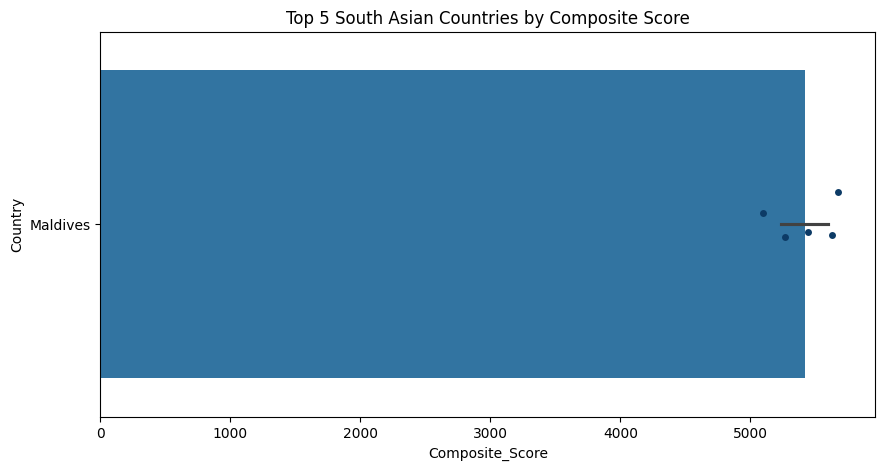

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,Composite_Score
3530,3531,MDV,Maldives,2022,0.762,80.839,0.523787,0.748233,0.767001,81.844,80.065,12.177951,13.333481,11.231514,7.762393,7.869674,7.655778,18846.79219,12160.79560,23783.29128,0.976,0.328,46.928068,46.269366,4.597701,95.402299,53.34,78.21,3.299409,3.271,5678.289357
3527,3528,MDV,Maldives,2019,0.753,80.116,0.504508,0.753833,0.752974,81.162,79.323,12.168620,13.271280,11.262660,7.421843,7.491472,7.351868,18679.92536,16103.37002,20560.79733,1.001,0.336,45.125182,44.598528,4.597701,95.402299,50.61,78.60,3.870900,3.271,5628.012408
3526,3527,MDV,Maldives,2018,0.747,80.013,0.489758,0.727985,0.754359,81.074,79.210,12.159311,13.209945,11.294066,7.096234,7.131445,7.060021,18055.72465,10856.64046,23316.87079,0.965,0.328,43.322295,42.927689,5.882353,94.117647,48.22,77.62,3.553592,3.271,5440.721295
3525,3526,MDV,Maldives,2017,0.740,79.943,0.472442,0.719525,0.748967,81.058,79.102,12.150001,13.148609,11.325471,6.784910,6.788720,6.779760,17474.64201,10226.30166,22787.05892,0.961,0.336,41.519409,41.256851,5.882353,94.117647,45.84,76.65,3.202933,3.271,5266.375503
3524,3525,MDV,Maldives,2016,0.734,79.872,0.454253,0.728061,0.738190,80.814,79.146,12.140692,13.087273,11.356877,6.512264,6.492385,6.531175,16911.45422,13569.38303,19370.04784,0.986,0.355,39.018824,39.120798,5.882353,94.117647,43.45,75.67,3.161901,3.271,5097.397866


In [542]:
south_asia_clean_df['Composite_Score'] = (
    0.30 * south_asia_clean_df['life_expectancy'] +
    0.30 * south_asia_clean_df['gross_inc_percap']
)

south_asia_clean_df = (
    south_asia_clean_df.
    sort_values(by='Composite_Score',ascending=False)
)

top5_countries_hdi = south_asia_clean_df.head(5)

plt.figure(figsize=(10, 5))
sns.barplot(
    data = top5_countries_hdi,
    x='Composite_Score',
    y='country')

sns.stripplot(
    data=top5_countries_hdi,
    x='Composite_Score',
    y='country',
    color='#0D3B66'
)

plt.xlabel('Composite_Score')
plt.ylabel('Country')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.show()

top5_countries_hdi

### Task 3: Outlier Detection
* Detect outliers in HDI and GNI per Capita using the 1.5 × IQR rule.
* Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.
* Discuss why the identified countries stand out as outliers.

HDI Outliers: []
GNI Outliers: ['Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Sri Lanka']



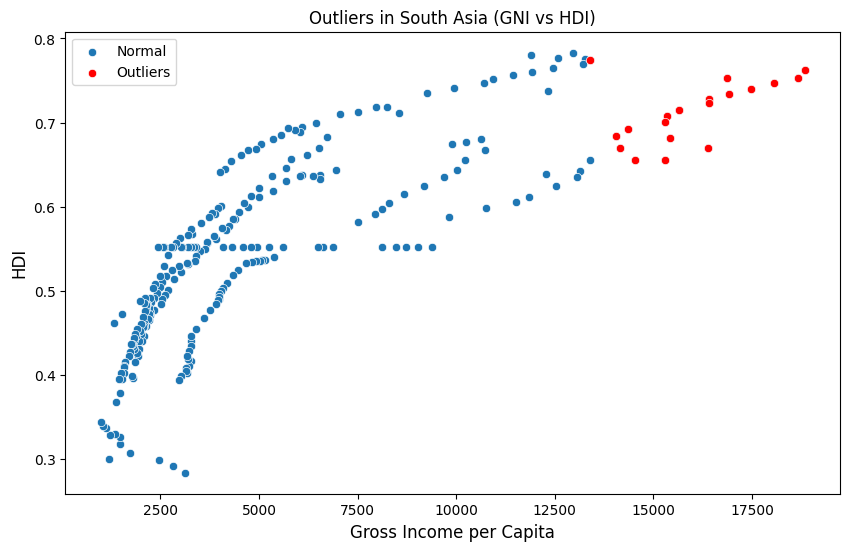

In [543]:
# Outlier Detection (1.5 * IQR Rule)
def outliers_detection(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

hdi_outliers = outliers_detection(south_asia_clean_df, 'hdi')
gni_outliers = outliers_detection(south_asia_clean_df, 'gross_inc_percap')

print(f"HDI Outliers: {hdi_outliers['country'].tolist()}")
print(f"GNI Outliers: {gni_outliers['country'].tolist()}\n")

# Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=south_asia_clean_df,
    x='gross_inc_percap',
    y='hdi',
    label='Normal'
    )

if not gni_outliers.empty:
    sns.scatterplot(
        data=gni_outliers,
        x='gross_inc_percap',
        y='hdi',
        color='red',
        label='Outliers')
plt.xlabel('Gross Income per Capita', fontsize=12)
plt.ylabel('HDI', fontsize=12)
plt.title('Outliers in South Asia (GNI vs HDI)')
plt.legend()
plt.show()

### Task 4: Exploring Metric Relationships
* Select two HDI components (e.g., Gender Development Index {"gender development"} and Life
Expectancy Index {"life expectancy"}).
* Compute Pearson correlation of each metric with HDI.
* Create scatter plots with trendlines to visualize the relationships.
* Discuss:
– Which metric is most strongly related to HDI and shows the weakest relationship with HDI.

Pearson Correlation with HDI:
gender_development    0.746607
life_expectancy       0.932578
hdi                   1.000000
Name: hdi, dtype: float64


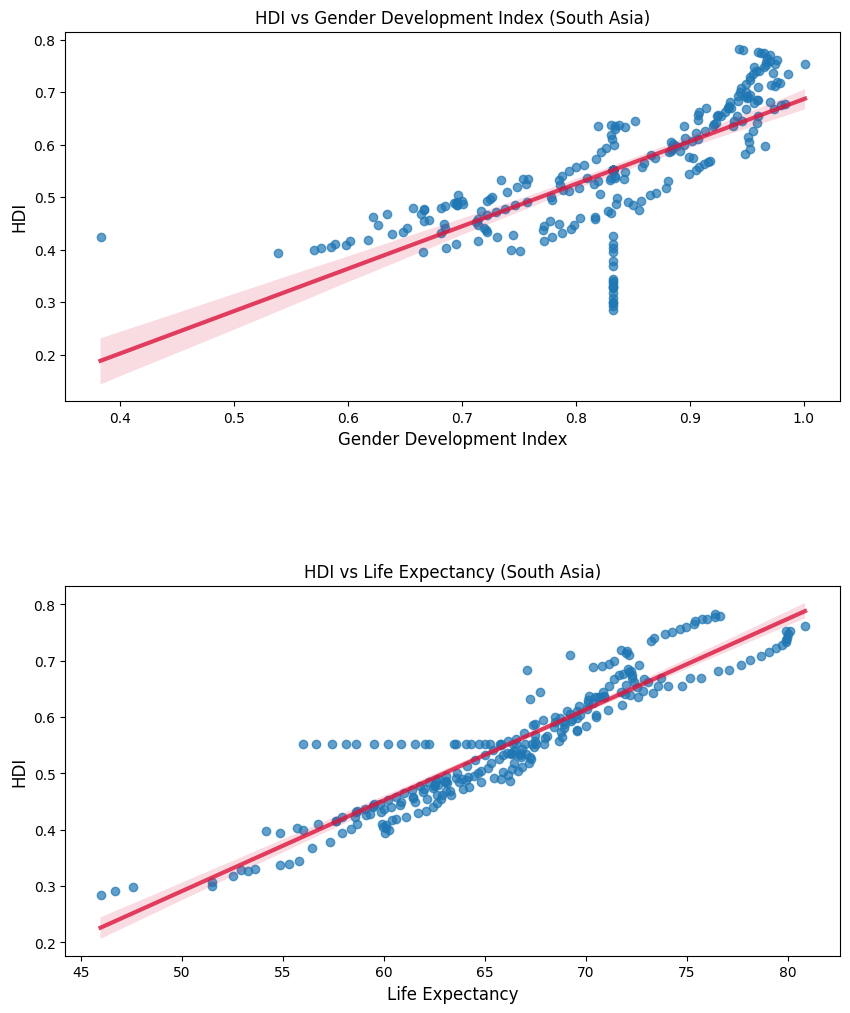

In [544]:
# Selecting relevant columns
hdi_metrics_df = south_asia_clean_df[
    ['gender_development', 'life_expectancy', 'hdi']
]

# Pearson correlation
hdi_metric_correlations = hdi_metrics_df.corr(method='pearson')

print("Pearson Correlation with HDI:")
print(hdi_metric_correlations['hdi'])

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot: Gender Development vs HDI
sns.regplot(
    x='gender_development',
    y='hdi',
    data=south_asia_clean_df,
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'crimson', 'linewidth': 3, 'alpha': 0.8},
    ax=axes[0]
)
axes[0].set_xlabel("Gender Development Index", fontsize=12)
axes[0].set_ylabel("HDI", fontsize=12)
axes[0].set_title("HDI vs Gender Development Index (South Asia)")

# Plot: Life Expectancy vs HDI
sns.regplot(
    x='life_expectancy',
    y='hdi',
    data=south_asia_clean_df,
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'crimson', 'linewidth': 3, 'alpha': 0.8},
    ax=axes[1]
)
axes[1].set_xlabel("Life Expectancy", fontsize=12)
axes[1].set_ylabel("HDI", fontsize=12)
axes[1].set_title("HDI vs Life Expectancy (South Asia)")

plt.subplots_adjust(hspace=0.5)

plt.show()


### 4.4: Disscussion

From the above graph, it is observed that Life expectancy index is most strongly related to HDI

### Task 5: Gap Analysis:
* Create a new metric:
GNI HDI Gap = "gross inc percap" − "hdi"
* Rank South Asian countries by GNI HDI Gap in descending and ascending order.
* Plot the top 3 positive gaps and top 3 negative gaps.
* Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.

Top 3 Positive Gaps:


,country,GNI_HDI_Gap
3530,Maldives,18846.03019
3527,Maldives,18679.17236
3526,Maldives,18054.97765



Top 3 Negative Gaps:


,country,GNI_HDI_Gap
9,Afghanistan,1121.985570
10,Afghanistan,1047.002686
11,Afghanistan,980.789554


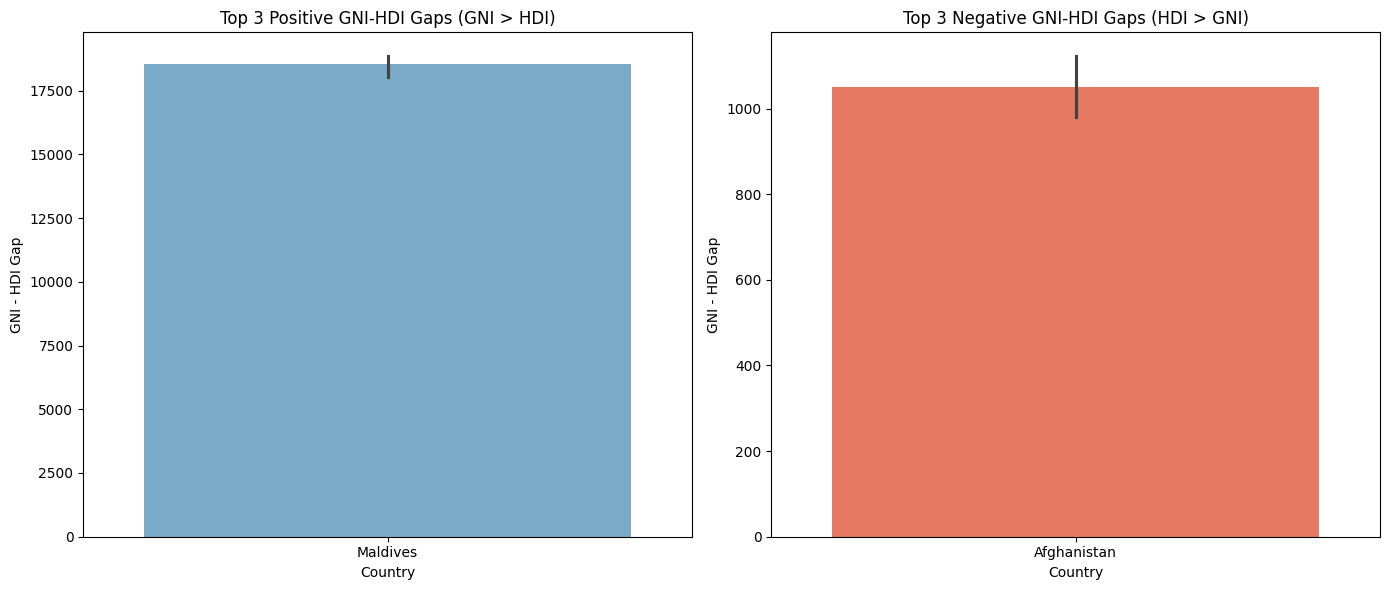

In [545]:
# Gap = GNI - HDI
south_asia_df['GNI_HDI_Gap'] = (
    south_asia_df['gross_inc_percap'] - south_asia_df['hdi']
)

south_asia_df = south_asia_df.sort_values(by='GNI_HDI_Gap', ascending=False)

# Top 3 positive gaps
top_positive_gap = south_asia_df.head(3)

# Top 3 negative gaps
top_negative_gap = south_asia_df.tail(3)

print("Top 3 Positive Gaps:")
display(top_positive_gap[['country', 'GNI_HDI_Gap']])

print("\nTop 3 Negative Gaps:")
display(top_negative_gap[['country', 'GNI_HDI_Gap']])

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Positive gaps plot
sns.barplot(
    data=top_positive_gap,
    x = 'country',
    y = 'GNI_HDI_Gap',
    hue = 'country',
    ax=axes[0],
    palette ='Blues_r'
)
axes[0].set_title("Top 3 Positive GNI-HDI Gaps (GNI > HDI)")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("GNI - HDI Gap")

# Negative gaps plot
sns.barplot(
    data=top_negative_gap,
    x = 'country',
    y = 'GNI_HDI_Gap',
    hue = 'country',
    ax=axes[1],
    palette ='Reds_r'
)
axes[1].set_title("Top 3 Negative GNI-HDI Gaps (HDI > GNI)")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("GNI - HDI Gap")

plt.tight_layout()
plt.show()

#### 5.4: Discussion

The gap decribes the story of countries with high income but low HDi meaning the gap implies that the weatlth of the country is not effectively being converted in better welfare of the population i.e. health care, education service, living standards and so on.

### Problem 3: Comparative Regional Analysis: South Asia vs Middle East

### Task 1: Create Middle East Subset:
* Define the list of Middle East countries: ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"].
* Filter the dataset from Problem 1B (HDI problem1B.csv) to create subsets for South Asia and Middle East.
* Save these subsets as HDI SouthAsia 2020 2022.csv and HDI MiddleEast 2020 2022.csv for use in subsequent tasks.

In [546]:
# Create Subsets (from 2020-2022 Data)
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

south_asia_df_2020_22 = (
    hdi_2020_22_clean_df[hdi_2020_22_clean_df['country']
                         .isin(south_asia_countries)].copy()
)

south_asia_df_2020_22.loc[:, 'Region_Group'] = 'South Asia'

print("South Asian Countries Data for 2020-2022:")
display(south_asia_df_2020_22.head())

middle_east_df_2020_22 = (
    hdi_2020_22_clean_df[hdi_2020_22_clean_df['country']
                         .isin(middle_east_countries)].copy()
)

middle_east_df_2020_22.loc[:, 'Region_Group'] = 'Middle East'

print("\nMiddle Eastern Countries Data for 2020-2022:")
display(middle_east_df_2020_22.head())

south_asia_df_2020_22.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
print("\nSuccessfully Saved the updated dataset in HDI_SouthAsia_2020_2022.csv")

middle_east_df_2020_22.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)
print("\nSuccessfully Saved the updated dataset in HDI_MiddleEast_2020_2022.csv")

South Asian Countries Data for 2020-2022:


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,Region_Group
30,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,59.866,10.705385,8.053257,13.228449,2.84161,2.050737,3.407107,1986.803772,670.996249,3275.057369,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554,South Asia
31,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,58.915,10.705385,8.053257,13.228449,2.98507,2.311080,3.401310,1534.135377,618.868288,2430.862265,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351,South Asia
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.51479,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809,South Asia
459,460,BGD,Bangladesh,2020,0.657,71.968,167.420951,0.619431,0.682912,73.957,70.187,11.946330,12.406670,11.501720,7.37906,6.755380,8.020810,5822.800881,3272.145361,8413.176878,0.907,0.502,43.659868,50.507937,20.916905,79.083095,38.74,81.27,0.559159,4.5993,South Asia
460,461,BGD,Bangladesh,2021,0.662,72.381,169.356251,0.624949,0.687950,74.267,70.599,11.946330,12.406670,11.501720,7.37906,6.755380,8.020810,6220.542581,3518.545078,8966.290086,0.908,0.500,43.659868,50.507937,20.857143,79.142857,39.15,81.39,0.583153,4.6834,South Asia



Middle Eastern Countries Data for 2020-2022:


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,Region_Group
426,427,BHR,Bahrain,2020,0.884,79.174,1.477469,0.863605,0.897164,80.433,78.165,16.391227,16.989664,16.006907,11.046590,10.784370,11.173260,44780.535410,31548.344340,52788.58217,0.963,0.197,79.903572,83.080162,18.750000,81.250000,41.85,85.54,25.310785,23.5735,Middle East
427,428,BHR,Bahrain,2021,0.884,78.760,1.463266,0.842563,0.901353,80.018,77.757,16.345454,16.998037,15.868633,11.046590,10.784370,11.173260,46757.302760,21717.935170,62040.68089,0.935,0.192,79.903572,83.080162,18.750000,81.250000,42.43,85.77,26.053039,19.6832,Middle East
428,429,BHR,Bahrain,2022,0.888,79.246,1.472233,0.847334,0.904299,80.497,78.242,16.299681,17.006411,15.730360,11.046590,10.784370,11.173260,48731.445640,22722.178520,64699.53364,0.937,0.181,79.903572,83.080162,22.500000,77.500000,42.43,85.77,26.053039,20.3063,Middle East
2670,2671,IRQ,Iraq,2020,0.661,69.123,42.556984,0.557776,0.711412,71.185,66.954,12.222756,11.643529,12.772393,6.811879,5.648159,7.995557,8749.302168,2003.301818,15483.21171,0.784,0.569,25.299578,40.352954,26.443769,73.556231,10.87,69.29,3.755912,5.8825,Middle East
2671,2672,IRQ,Iraq,2021,0.667,70.378,43.533592,0.560132,0.717141,72.422,68.200,12.222756,11.643529,12.772393,6.811879,5.648159,7.995557,8684.231347,1930.380019,15419.11248,0.781,0.563,25.299578,40.352954,28.875380,71.124620,10.77,68.24,3.872580,5.0368,Middle East



Successfully Saved the updated dataset in HDI_SouthAsia_2020_2022.csv

Successfully Saved the updated dataset in HDI_MiddleEast_2020_2022.csv


### Task 2. Descriptive Statistics:
* Compute the mean and standard deviation of HDI for each region (South Asia vs Middle East)
across 2020–2022.
* Identify which region performs better on average.

In [547]:
combined_region = pd.concat(
    [south_asia_df_2020_22, middle_east_df_2020_22],
    ignore_index=True
)

# Descriptive statistics: mean and standard deviation
region_stats = (
    combined_region.groupby('Region_Group')['hdi'].
    describe()[['mean', 'std']]
)

print("Descriptive statistics for south asian and middle eastern countires:")
display(region_stats)

Descriptive statistics for south asian and middle eastern countires:


,mean,std
Region_Group,,
Middle East,0.788909,0.141295
South Asia,0.639583,0.098273


### 3.2 Disscussion:

The middle east performs better on average than Soudth Asia because mean for middle east(0.7889) is greater than south asia(0.6396)

### Task 3: Top and Bottom Performers:
* Identify the top 3 and bottom 3 countries in each region based on HDI.
* Create a bar chart comparing these top and bottom performers across the two regions.

In [548]:
def top_bottom(df, region_name):
    reg_group_df = (
        df.groupby(['Region_Group', 'country'])['hdi']
        .mean()
        .reset_index()
    )

    top3_data = reg_group_df.sort_values(by='hdi', ascending=False).head(3)
    bottom3_data = reg_group_df.sort_values(by='hdi').head(3)

    print(f"\nTop 3 from {region_name} region:\n{top3_data}\n")
    print(f"\nBottom 3 from {region_name} region:\n{bottom3_data}\n")
    return top3_data, bottom3_data

sa_top, sa_bottom = top_bottom(south_asia_df_2020_22, "South Asia")
me_top, me_bottom = top_bottom(middle_east_df_2020_22, "Middle East")



Top 3 from South Asia region:
  Region_Group    country       hdi
7   South Asia  Sri Lanka  0.780000
4   South Asia   Maldives  0.750667
2   South Asia     Bhutan  0.677667


Bottom 3 from South Asia region:
  Region_Group      country       hdi
0   South Asia  Afghanistan  0.474333
6   South Asia     Pakistan  0.537667
5   South Asia        Nepal  0.595000


Top 3 from Middle East region:
  Region_Group               country       hdi
9  Middle East  United Arab Emirates  0.932667
2  Middle East                Israel  0.910667
0  Middle East               Bahrain  0.885333


Bottom 3 from Middle East region:
   Region_Group  country       hdi
10  Middle East    Yemen  0.426333
1   Middle East     Iraq  0.667000
5   Middle East  Lebanon  0.730000



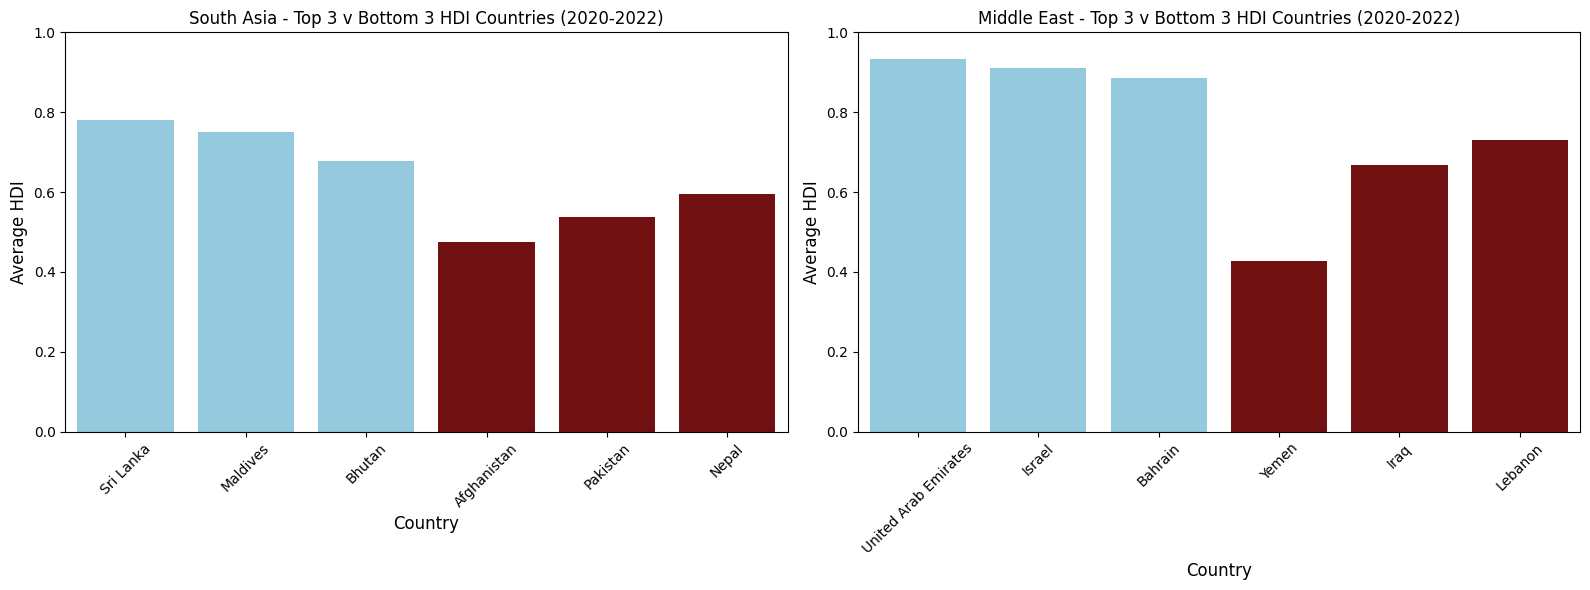

In [556]:
def plot_top_bottom(top, bottom, region_name, ax=None):

    combined = pd.concat([top, bottom]).reset_index(drop=True)
    palette = ['skyblue']*len(top) + ['maroon']*len(bottom)

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    sns.barplot(
        x='country',
        y='hdi',
        hue='country',
        data=combined,
        palette=palette,
        ax=ax,
        legend=False
    )

    ax.set_title(f"{region_name} - Top 3 v Bottom 3 HDI Countries (2020-2022)")
    ax.set_ylabel("Average HDI", fontsize=12)
    ax.set_xlabel("Country", fontsize=12)
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=45)

# For creating side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_top_bottom(sa_top, sa_bottom, "South Asia", ax=axes[0])
plot_top_bottom(me_top, me_bottom, "Middle East", ax=axes[1])

plt.tight_layout()
plt.show()

### Task 4. Metric Comparisons:
* Compare the following metrics across regions using grouped bar charts:
  * Gender Development Index {"gender development"}
  * Life Expectancy Index {"life expectancy"}
  * GNI per Capita Index {"gross inc percap"}
* Identify which metric shows the greatest disparity between regions.

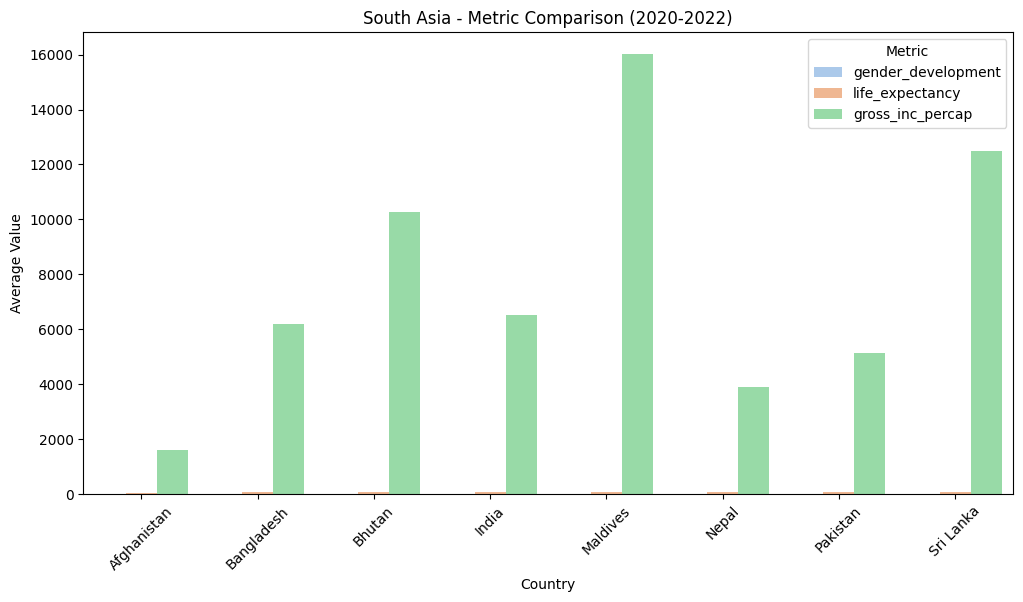

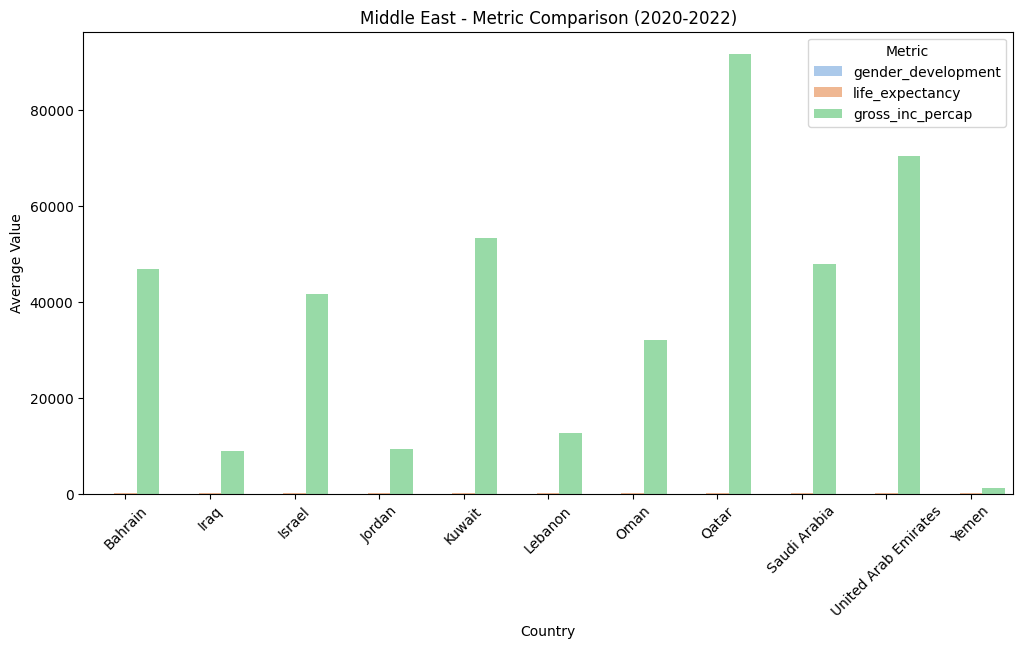

In [550]:
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']

def plot_metrics_comparisions(df, region_name):
  avg_df = df.groupby('country')[metrics].mean().reset_index()
  avg_df_melt = avg_df.melt(id_vars='country', var_name='Metric', value_name='Value')

  plt.figure(figsize = (12, 6))

  sns.barplot(
      data = avg_df_melt,
      x = 'country',
      y = 'Value',
      hue = 'Metric',
      palette = 'pastel'
  )

  plt.title(f"{region_name} - Metric Comparison (2020-2022)")
  plt.ylabel("Average Value")
  plt.xlabel("Country")
  plt.xticks(rotation=45)
  plt.legend(title='Metric')
  plt.show()

plot_metrics_comparisions(south_asia_df_2020_22, "South Asia")
plot_metrics_comparisions(middle_east_df_2020_22, "Middle East")

### Task 5. HDI Disparity:
* Compute the range (max – min) of HDI for each region.
* Compute the coefficient of variation (CV = std/mean) for HDI.
* Identify which region exhibits more variation in HDI.

In [551]:
def hdi_disparity(df, region_name):
  hdi_range = df['hdi'].max() - df['hdi'].min()
  hdi_cv = df['hdi'].std() / df['hdi'].mean()
  print(f"For {region_name}:")
  print(f"HDI Range: {hdi_range:.2f} and Coefficient of Variation: {hdi_cv:.2f}")

hdi_disparity(south_asia_df_2020_22, "South Asia")
hdi_disparity(middle_east_df_2020_22, "Middle East")

For South Asia:
HDI Range: 0.32 and Coefficient of Variation: 0.15
For Middle East:
HDI Range: 0.51 and Coefficient of Variation: 0.18


### Task 6. Correlation Analysis:
* For each region, compute correlations of HDI with:
  * Gender Development Index
  * Life Expectancy Index
* Create scatter plots with trendlines for each correlation.
* Interpret the strength and direction of these relationships.

For South Asia:
Correlation between gender_development and HDI: 0.87


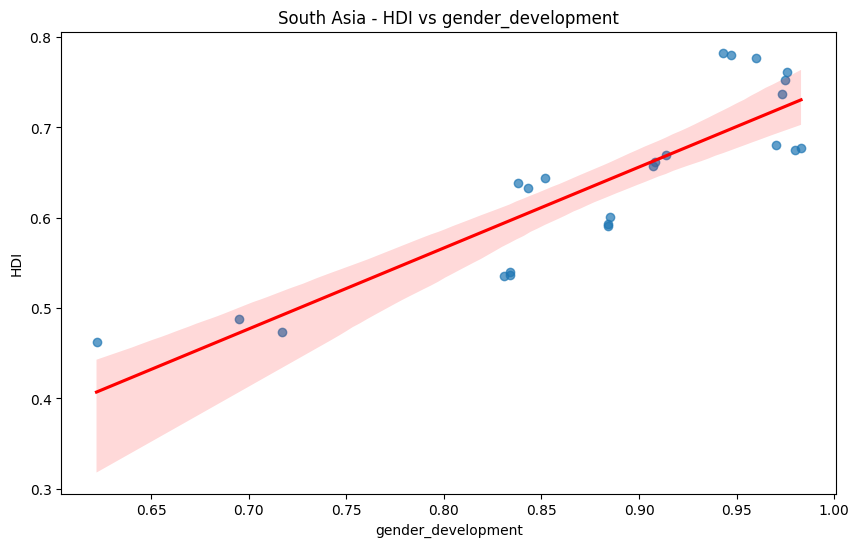

For Middle East:
Correlation between gender_development and HDI: 0.94


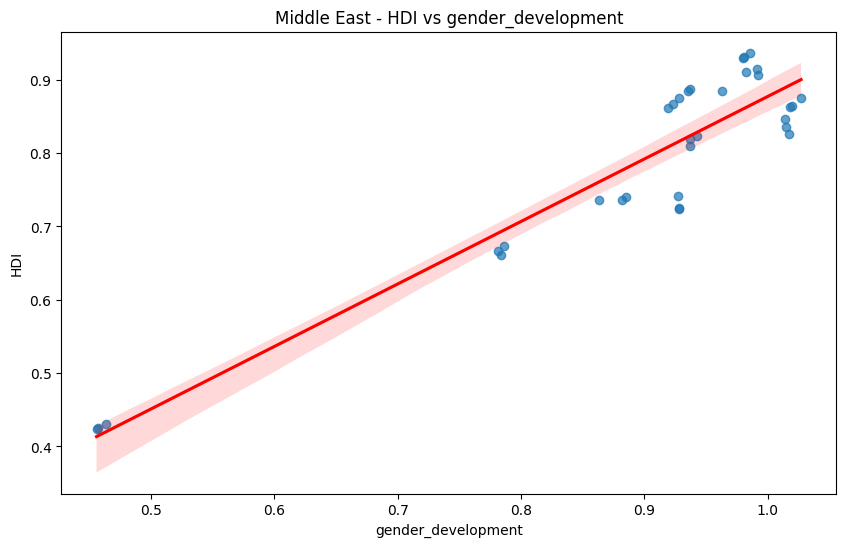

For South Asia:
Correlation between life_expectancy and HDI: 0.94


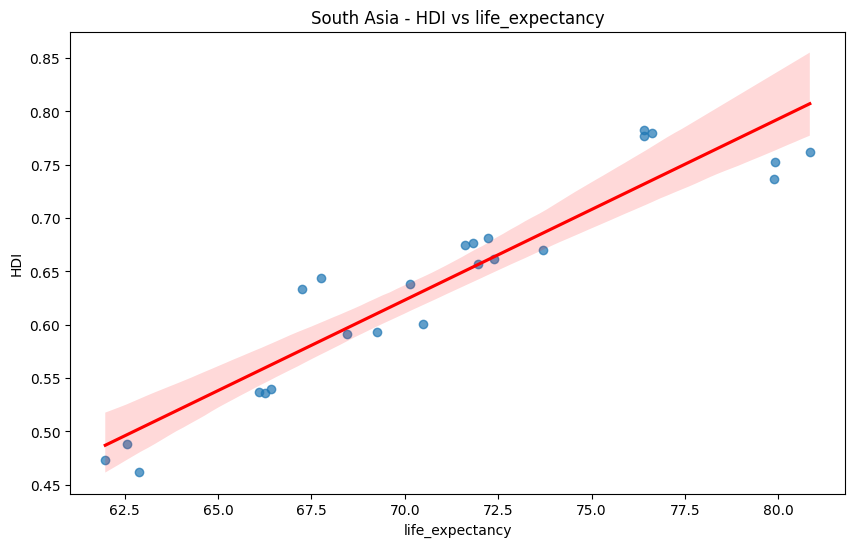

For Middle East:
Correlation between life_expectancy and HDI: 0.93


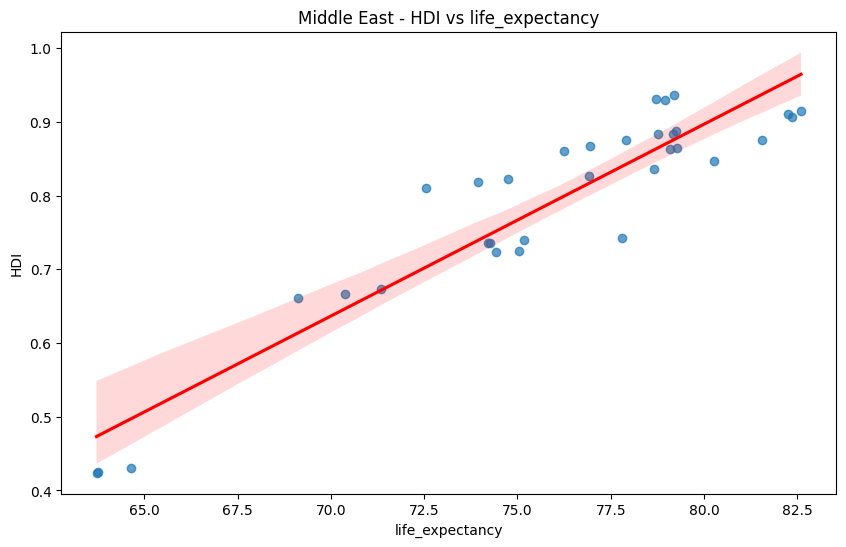

In [552]:
def correlation_scatter_plot(df, x_varrible, region_name):
  correlation = df[[x_varrible, 'hdi']].corr().iloc[0, 1]
  print(f"For {region_name}:")
  print(f"Correlation between {x_varrible} and HDI: {correlation:.2f}")

  plt.figure(figsize=(10, 6))
  sns.regplot(
      data = df,
      x = x_varrible,
      y = 'hdi',
      scatter_kws={'alpha':0.7},
      line_kws={'color':'red'}
  )
  plt.title(f"{region_name} - HDI vs {x_varrible}")
  plt.xlabel(x_varrible)
  plt.ylabel("HDI")
  plt.show()

for x in ['gender_development', 'life_expectancy']:
    correlation_scatter_plot(south_asia_df_2020_22, x, "South Asia")
    correlation_scatter_plot(middle_east_df_2020_22, x, "Middle East")

### Task 7: Outlier Detection:
* Detect outliers in HDI {"hdi"} and GNI per Capita {"gross inc percap"} for each region using
the 1.5 × IQR rule.
* Create scatter plots highlighting outliers in a different color.
* Discuss the significance of these outliers.

In [553]:
def detect_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IGR = Q3 - Q1
  lower_bound = Q1 - IGR * 1.5
  upper_bound = Q3 + IGR * 1.5
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return outliers

sa_outliers_hdi = detect_outliers(south_asia_df_2020_22, 'hdi')
me_outliers_hdi = detect_outliers(middle_east_df_2020_22, 'hdi')

print("="*50, "HDI outliers", "="*50)
print("\nSouth Asia HDI Outliers:\n", sa_outliers_hdi[['country','hdi']])
print("\nMiddle East HDI Outliers:\n", me_outliers_hdi[['country','hdi']])

sa_outliers = detect_outliers(south_asia_df_2020_22, 'gross_inc_percap')
me_outliers = detect_outliers(middle_east_df_2020_22, 'gross_inc_percap')

print("="*50, "gross_inc_percap outliers", "="*50)
print("\nSouth Asia HDI Outliers:\n", sa_outliers_hdi[['country','gross_inc_percap']])
print("\nMiddle East HDI Outliers:\n", me_outliers_hdi[['country','gross_inc_percap']])

================================================== HDI outliers ==================================================

South Asia HDI Outliers:
 Empty DataFrame
Columns: [country, hdi]
Index: []

Middle East HDI Outliers:
      country    hdi
6366   Yemen  0.430
6367   Yemen  0.425
6368   Yemen  0.424
================================================== gross_inc_percap outliers ==================================================

South Asia HDI Outliers:
 Empty DataFrame
Columns: [country, gross_inc_percap]
Index: []

Middle East HDI Outliers:
      country  gross_inc_percap
6366   Yemen       1152.015672
6367   Yemen       1112.162989
6368   Yemen       1105.763435
